In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import datetime
from scipy.optimize import curve_fit

Function to convert CSV files to pandas DataFrame. Discarding the description sentences on top of each file

In [2]:
def csv2dataframe(fileName):
    newdata=[]
    with open(fileName,'r') as fileData:
        rowData = csv.reader(fileData, 
                           delimiter = ',', 
                           quotechar = '"')
        for data in rowData:
            if len(data)>1:
                newdata.append(data[0:3])
    data_array = np.asarray(newdata)
    
    return convertDateTime(data_array)

First Column of the array is datetime with 'PST' extension. This function strips timezone and converts it into numpy datetime64 format

In [3]:
def convertDateTime(data_array):
    
    firstCol=data_array[1:,0]
    stripFirstCol=[ele.rstrip(' PST') for ele in firstCol]
    
    dateTimeFirstCol=[np.datetime64(ele) for ele in stripFirstCol]
    data_array[1:,0]=dateTimeFirstCol
    data_frame=pd.DataFrame(data_array.reshape(len(data_array),-1))
    
    data_frame.index=data_frame[0]
    data_frame=data_frame.drop(data_frame.columns[0],axis=1)


    data_frame.columns=data_frame.iloc[0]
    data_frame=data_frame.drop(data_frame.index[0])
    
    data_frame=data_frame.astype(str).astype(float)
    data_frame.index=pd.to_datetime(data_frame.index)
    data_frame=data_frame.resample('15T').mean()
    data_frame=data_frame[1:]
    return data_frame

In [4]:
reactivePfile='R3_12_47_1_AMI_residential_phase12_reactive_power.csv'
realPfile='R3_12_47_1_AMI_residential_phase12_real_power.csv'
reactiveVfile='R3_12_47_1_AMI_residential_phase12_reactive_voltage.csv'
realVfile='R3_12_47_1_AMI_residential_phase12_real_voltage.csv'
temperaturefile='R3_12_47_1_climate.csv'

In [5]:
reactivePowerdata=csv2dataframe(reactivePfile)
realPowerdata=csv2dataframe(realPfile)
reactiveVoltagedata=csv2dataframe(reactiveVfile)
realVoltagedata=csv2dataframe(realVfile)
temperaturedata=csv2dataframe(temperaturefile)

In [6]:
reactiveP=reactivePowerdata
realP=realPowerdata
reactiveV=reactiveVoltagedata
realV=realVoltagedata
amiTemp=temperaturedata

In [7]:
def getDateList(startDate,endDate):
    startDate=datetime.datetime.strptime(startDate,'%Y-%m-%d')
    #startDate=realPower.index[0]
    #startDate=startDate.date()

    endDate=datetime.datetime.strptime(endDate,'%Y-%m-%d')
    #endDate=realPower.index[len(realPower)-1]
    #endDate=endDate.date()

    numDays=endDate-startDate
    numDays=numDays.days

    date_list = [startDate + datetime.timedelta(days=x) for x in range(0, numDays)]
    return date_list

In [8]:
seasonDates=['2013-01-01','2013-03-01','2013-05-15']

In [9]:
def splitWDWE(data_frame,weekdays,weekends):
    weekdayResult=getDays(data_frame,weekdays)
    weekendResult=getDays(data_frame,weekends)
    return weekdayResult, weekendResult

In [15]:
def getDays(data_frame,days):
    result=data_frame[days[0]]
    for i in range(1,len(days)):
            result=result.append(data_frame[days[i]])
    return result

In [35]:
def getHourData(data_frame,hourwindow,hr):
    if hourwindow==1:
        result=data_frame[data_frame.index.hour == hr]
    else:
        result=data_frame[data_frame.index.hour == hr]
        for i in range(1,hourwindow):
            hr=hr+i
            result=result.append(data_frame[data_frame.index.hour == hr])
            
    return result

In [12]:
def myfunc(independentVar, a, b, c):
    x,t=independentVar
    return (a*(x)**2)+b*x+c+t

In [13]:
def myfunc1(independentVar, a,b):
    x,t=independentVar
    return t*(x**(a*b))

In [33]:
def RMS(yActual, yPredicted):
    squares = (yPredicted - yActual) ** 2
    result=(sum(squares)/len(yActual))**(0.5)
    return result

Find the Coefficients and RMSE values for different time windows, based on Season, Weekday, Weekend and Hourly

HOUR WINDOW IS 1
Season  1
2013-01-01
2013-03-01
Weekdays
0 to 4


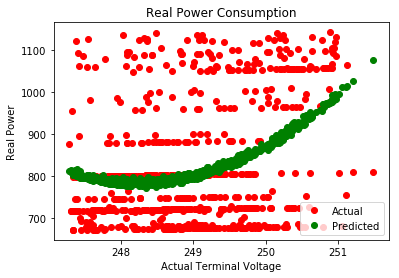

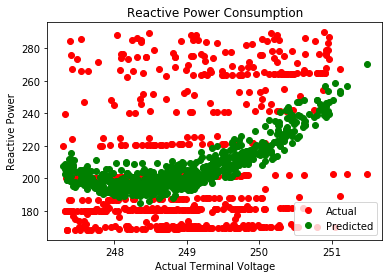

4 to 8


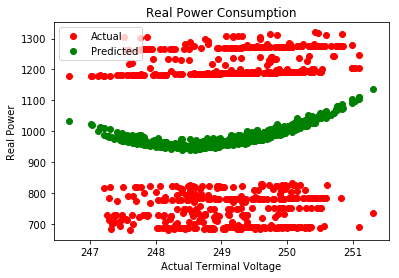

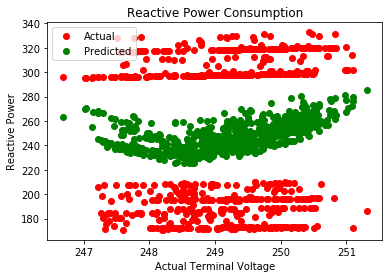

8 to 12


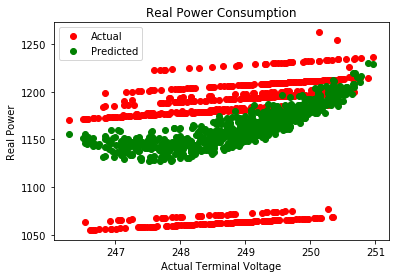

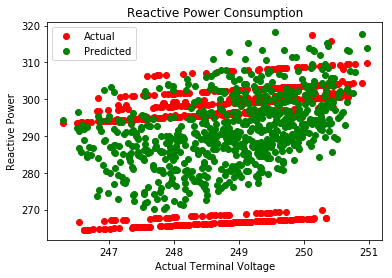

12 to 16


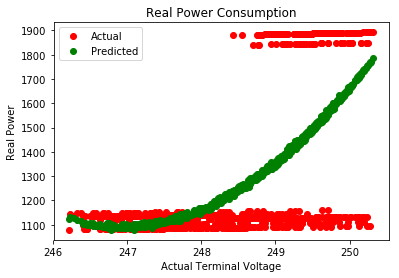

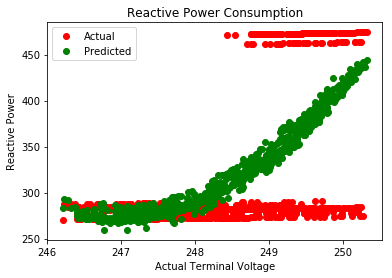

16 to 20


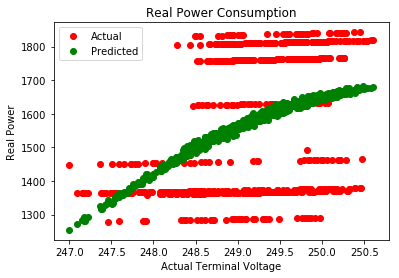

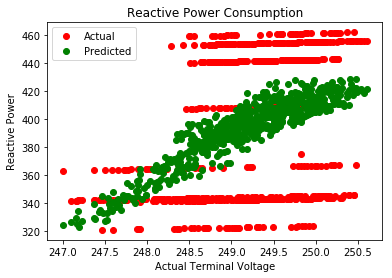

20 to 24


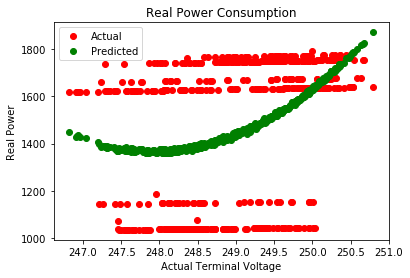

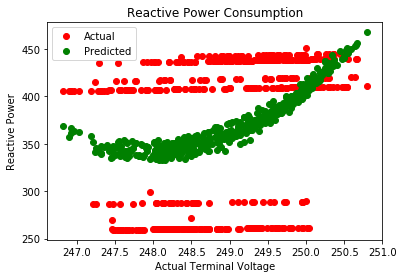

Weekends
0 to 4


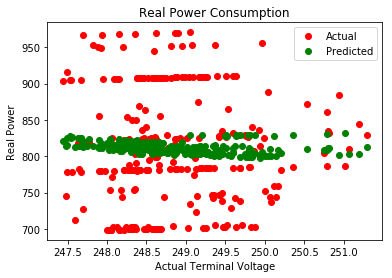

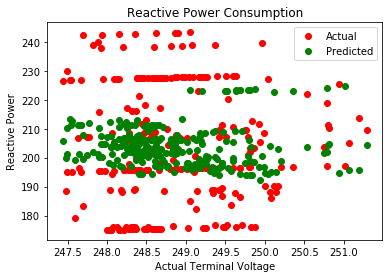

4 to 8


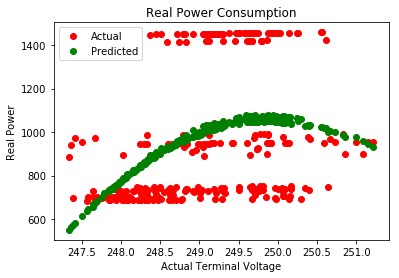

8 to 12


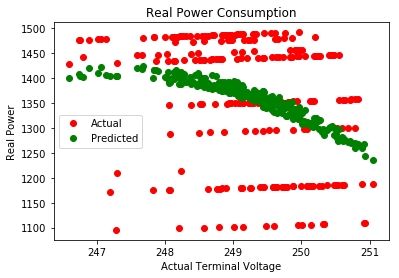

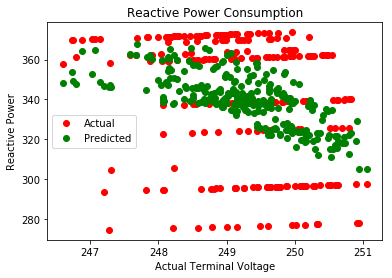

12 to 16


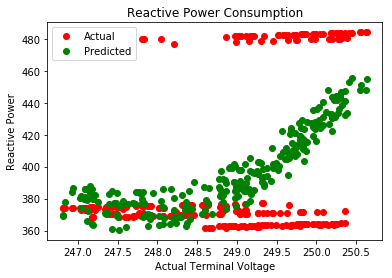

16 to 20


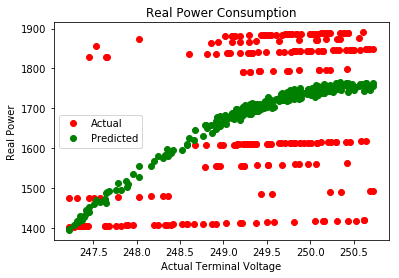

20 to 24


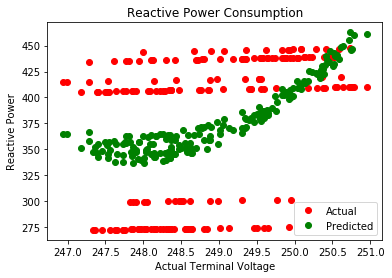

Season  2
2013-03-01
2013-05-15
Weekdays
0 to 4


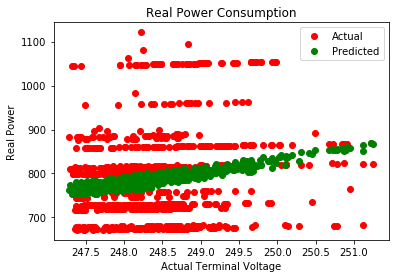

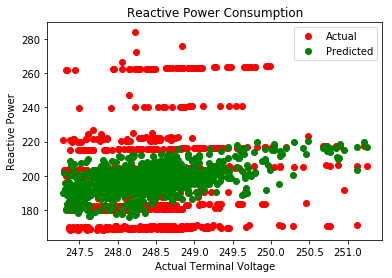

4 to 8


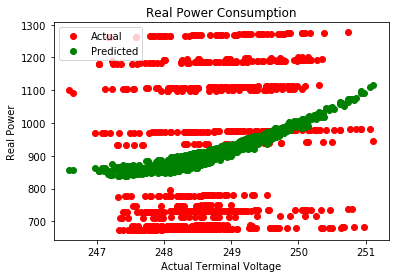

8 to 12


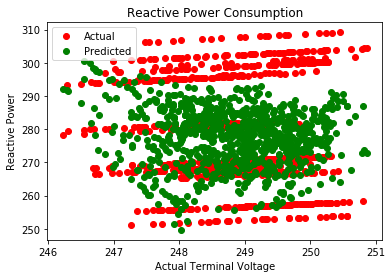

12 to 16


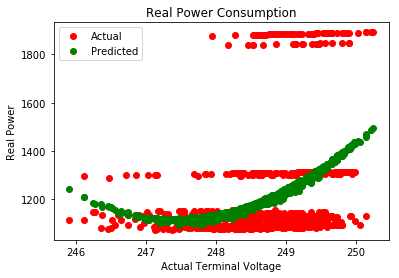

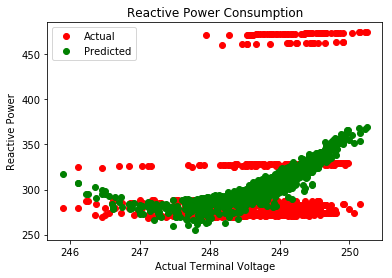

16 to 20


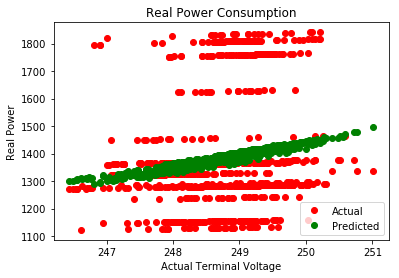

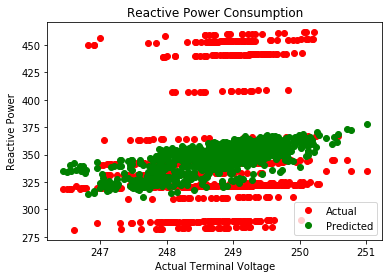

20 to 24


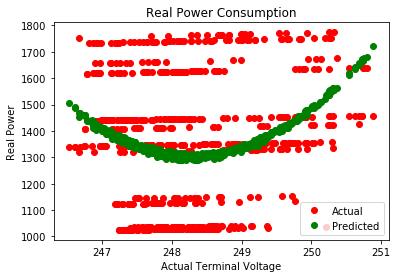

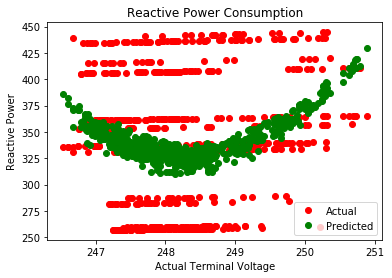

Weekends
0 to 4


4 to 8


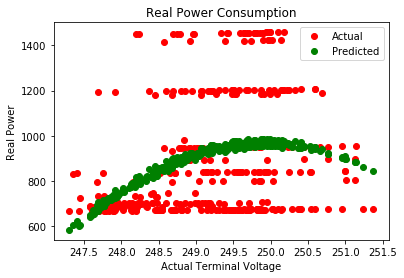

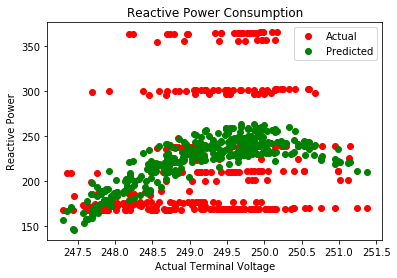

8 to 12


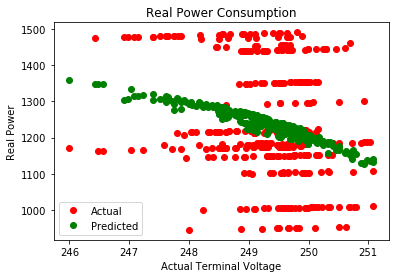

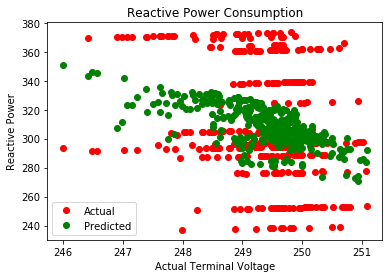

12 to 16


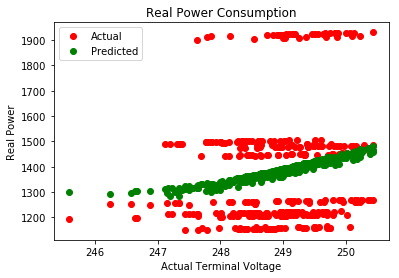

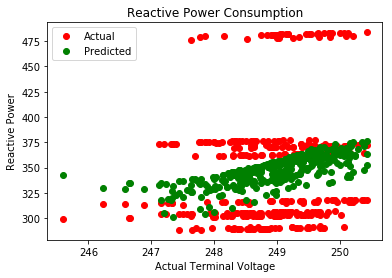

16 to 20


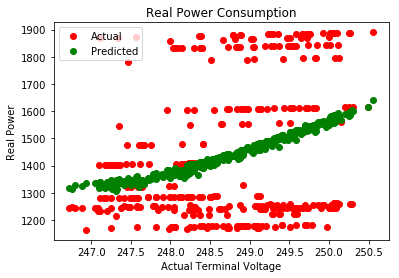

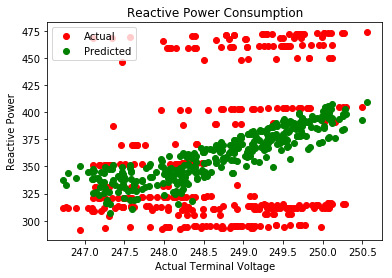

20 to 24


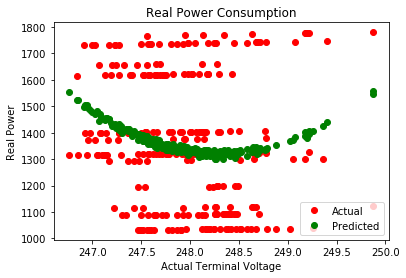

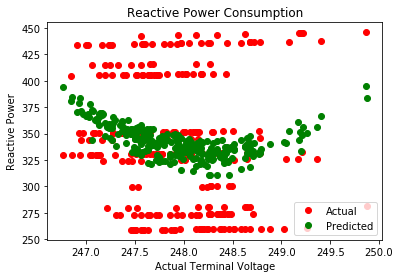

HOUR WINDOW IS 2
Season  1
2013-01-01
2013-03-01
Weekdays
0 to 4


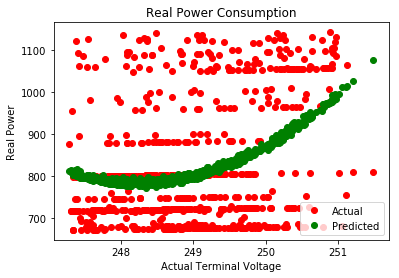

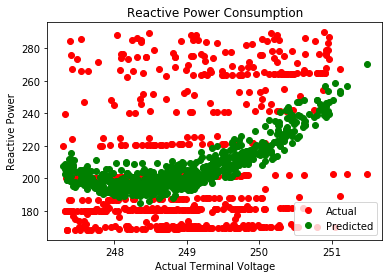

4 to 8


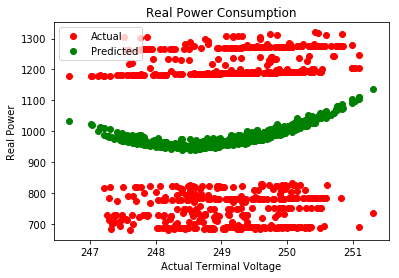

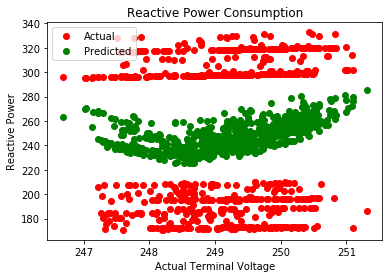

8 to 12


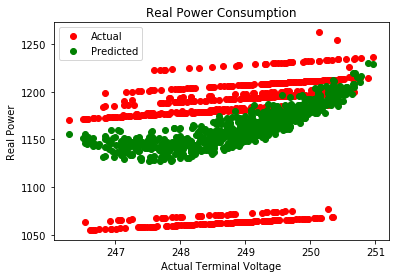

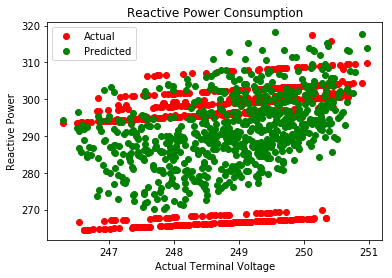

12 to 16


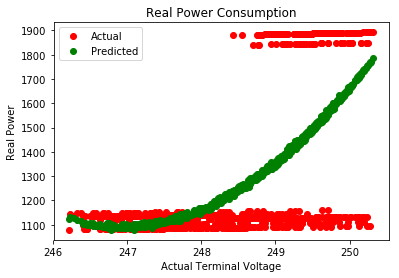

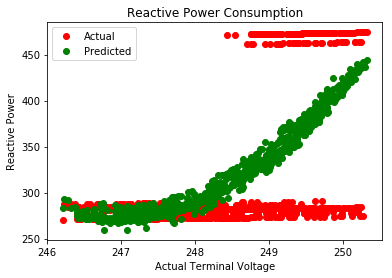

16 to 20


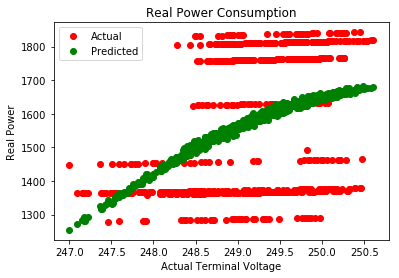

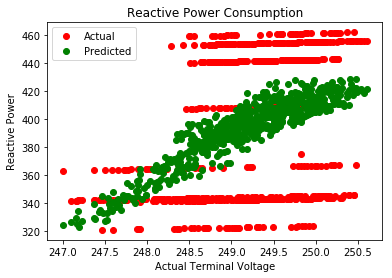

20 to 24


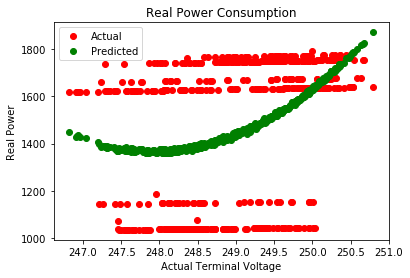

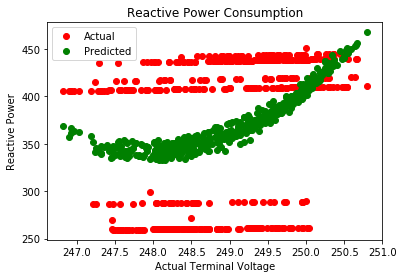

Weekends
0 to 4


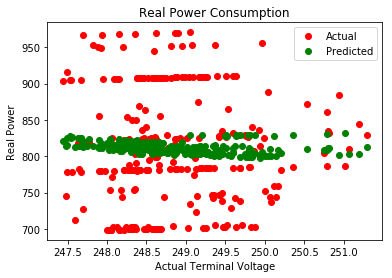

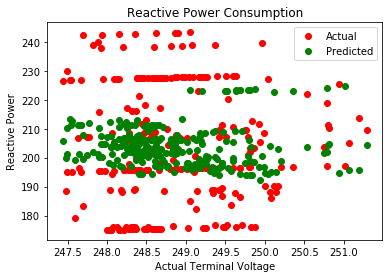

4 to 8


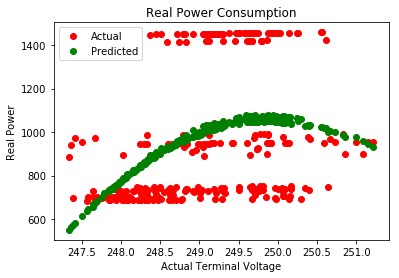

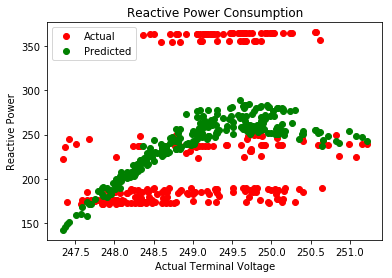

8 to 12


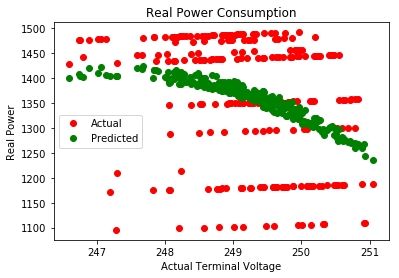

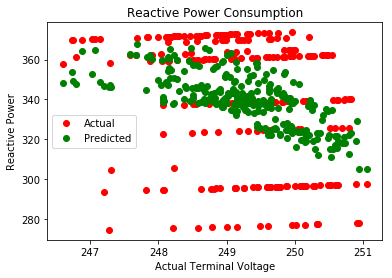

12 to 16


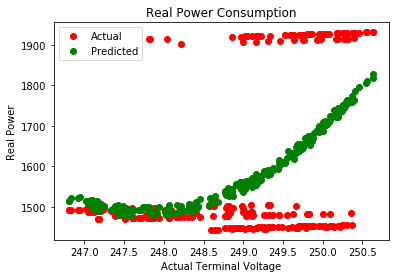

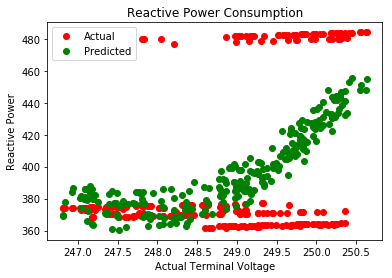

16 to 20


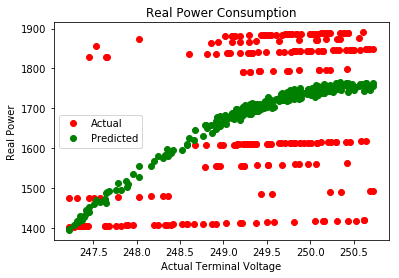

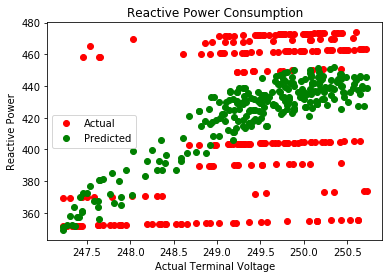

20 to 24


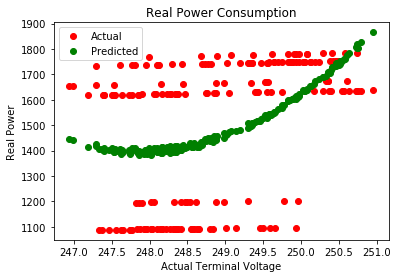

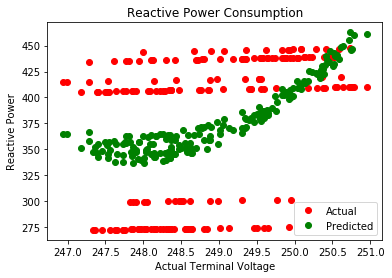

Season  2
2013-03-01
2013-05-15
Weekdays
0 to 4


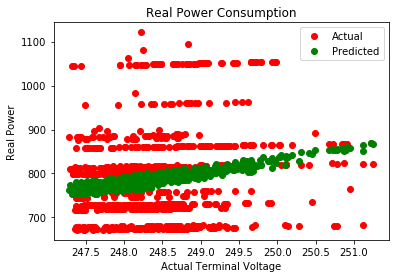

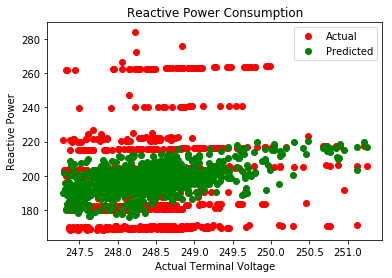

4 to 8


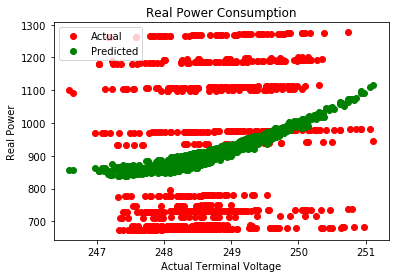

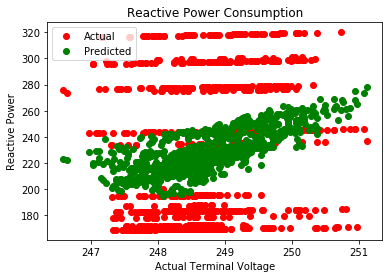

8 to 12


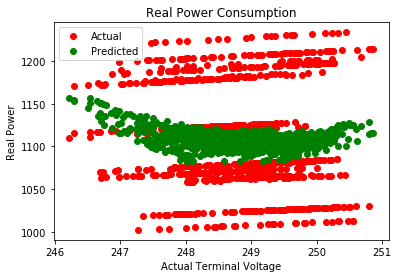

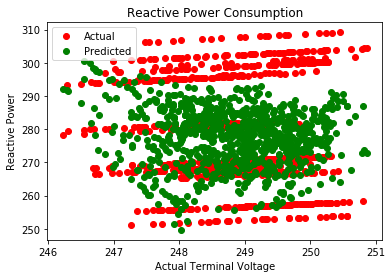

12 to 16


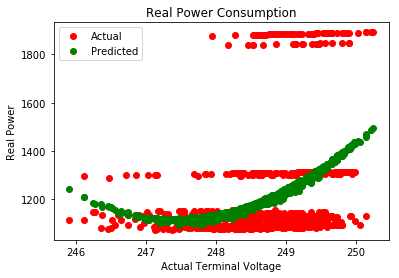

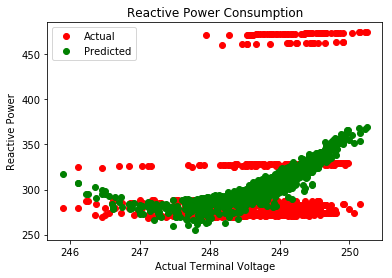

16 to 20


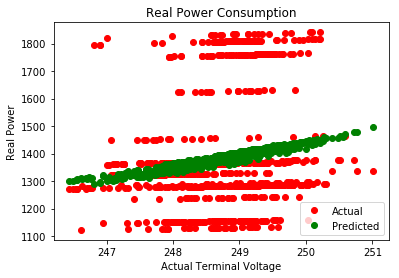

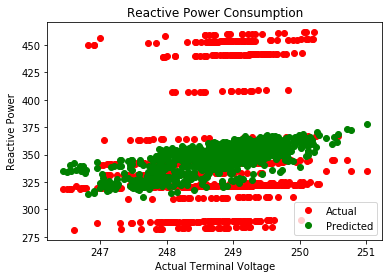

20 to 24


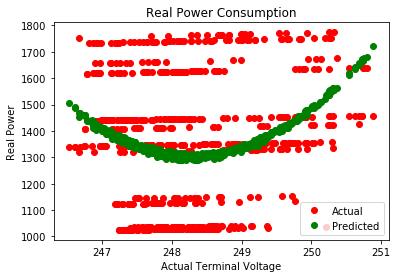

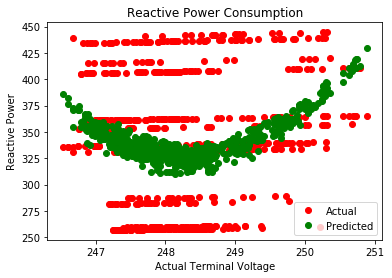

Weekends
0 to 4


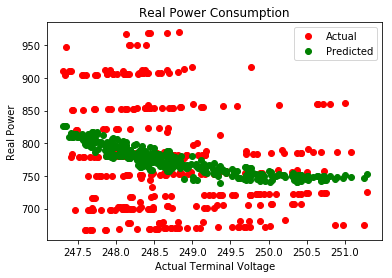

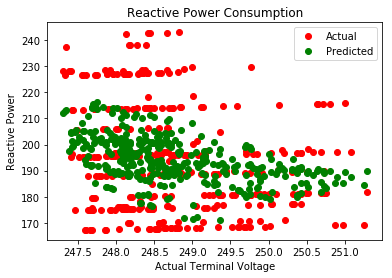

4 to 8


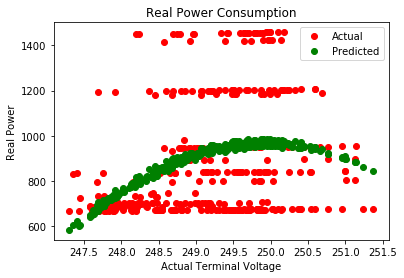

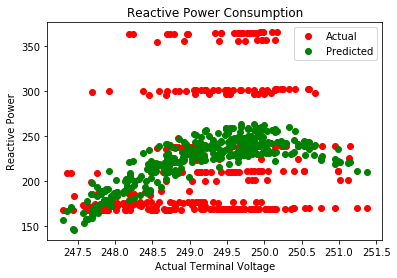

8 to 12


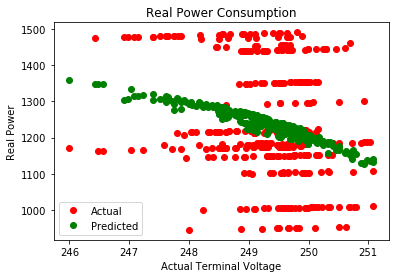

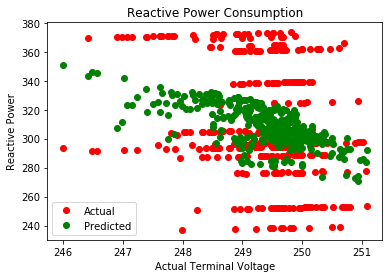

12 to 16


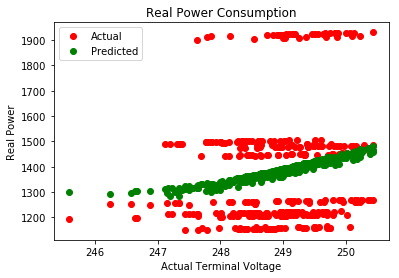

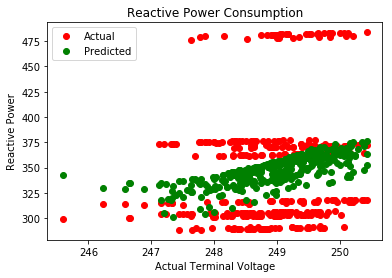

16 to 20


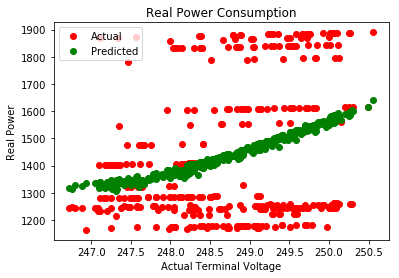

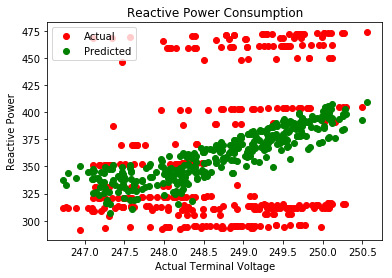

20 to 24


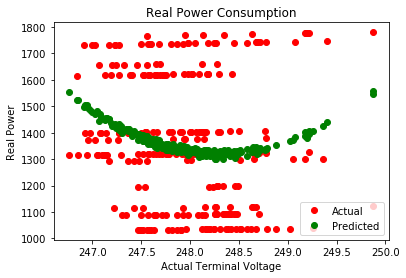

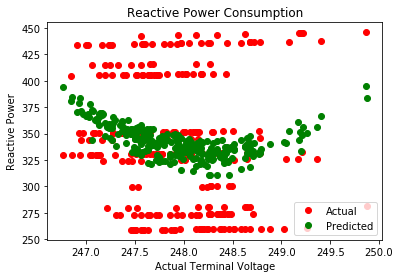

HOUR WINDOW IS 4
Season  1
2013-01-01
2013-03-01
Weekdays
0 to 4


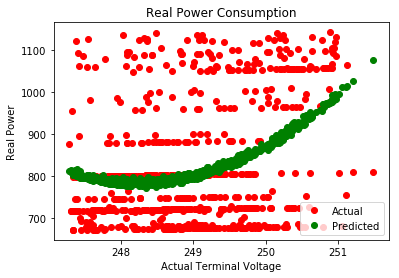

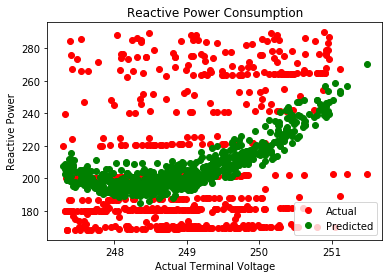

4 to 8


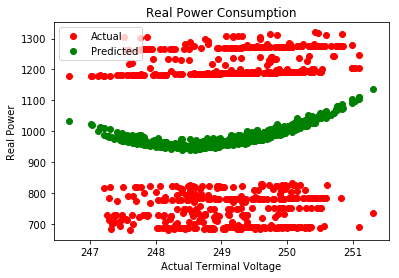

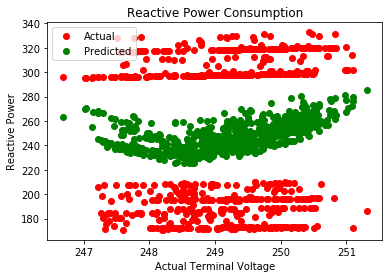

8 to 12


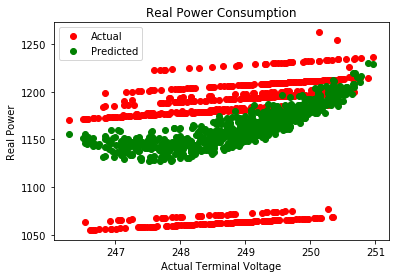

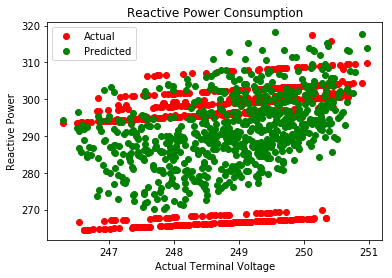

12 to 16


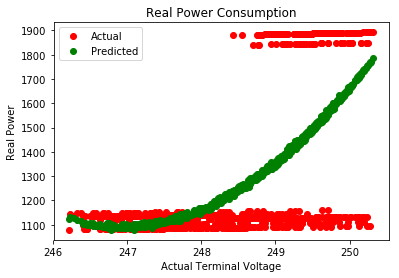

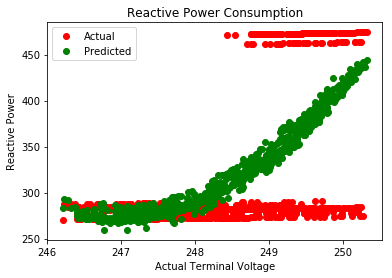

16 to 20


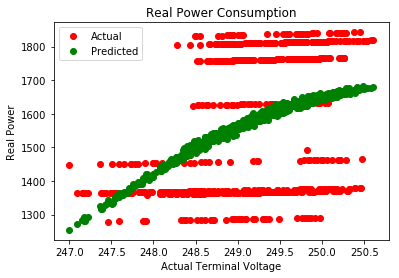

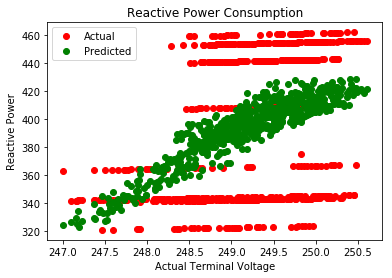

20 to 24


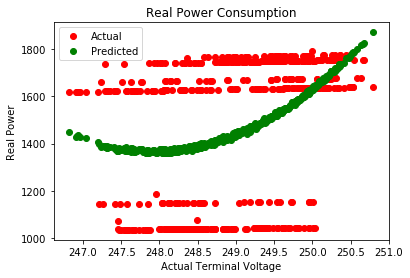

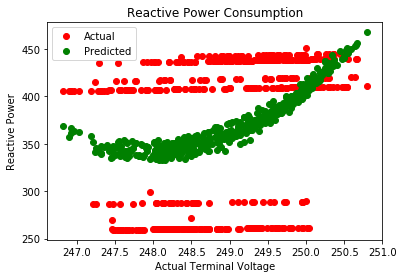

Weekends
0 to 4


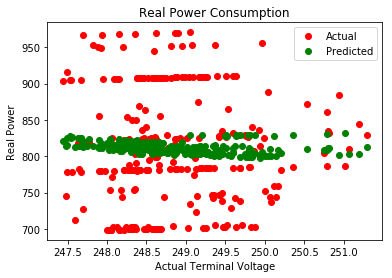

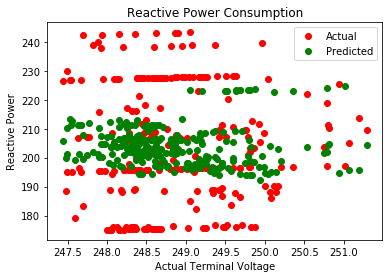

4 to 8


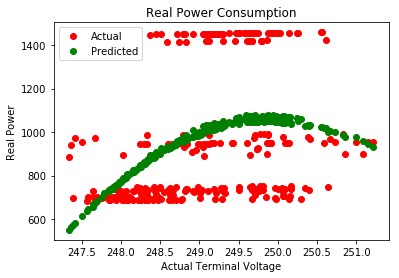

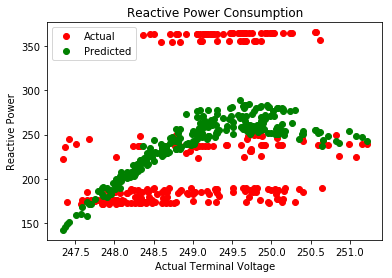

8 to 12


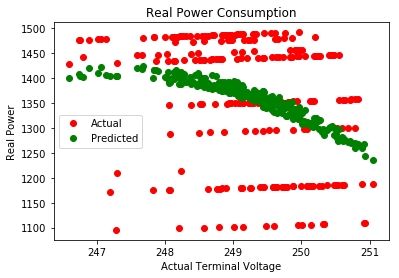

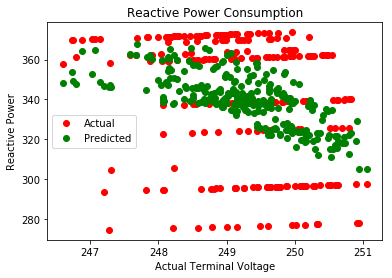

12 to 16


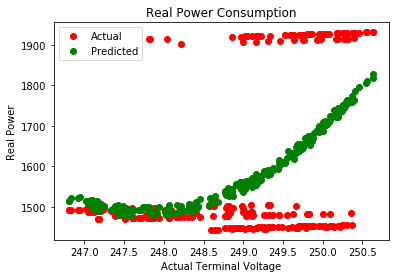

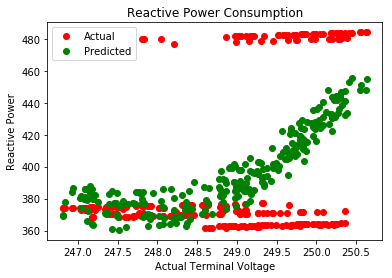

16 to 20


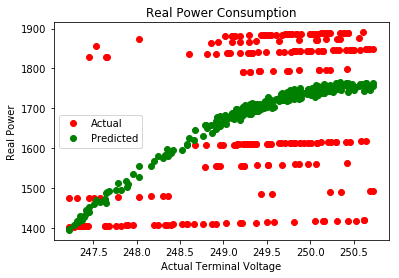

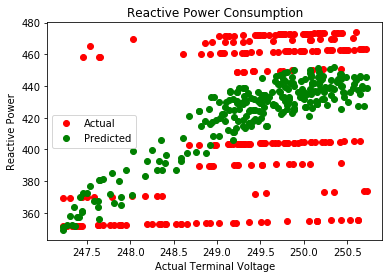

20 to 24


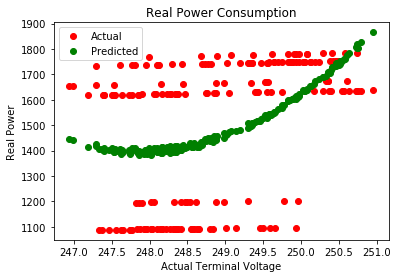

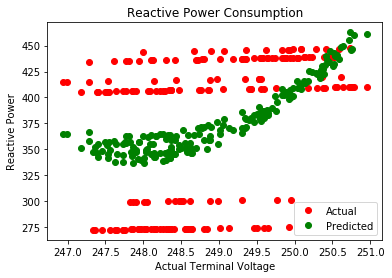

Season  2
2013-03-01
2013-05-15
Weekdays
0 to 4


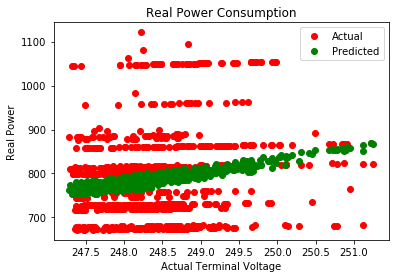

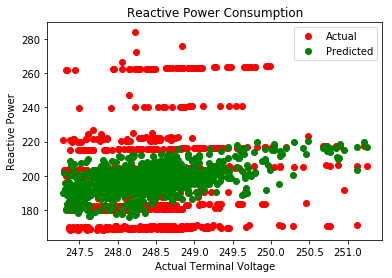

4 to 8


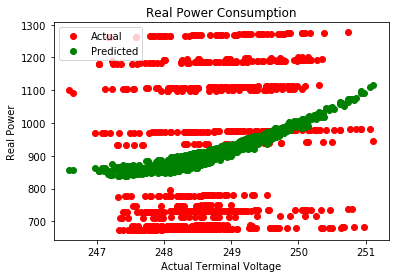

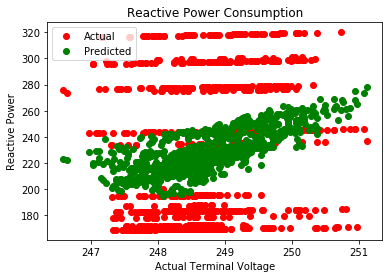

8 to 12


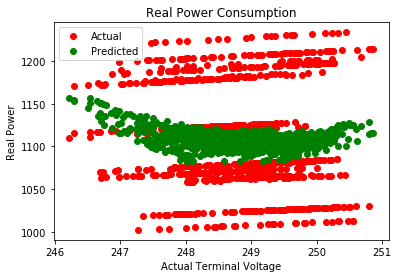

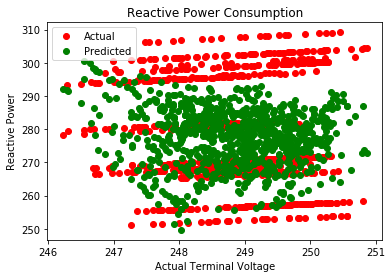

12 to 16


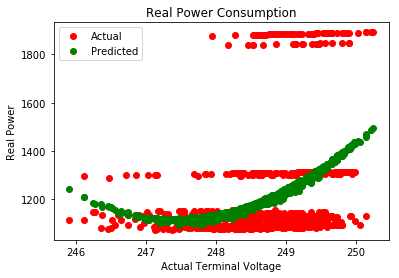

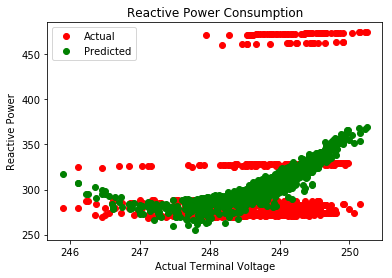

16 to 20


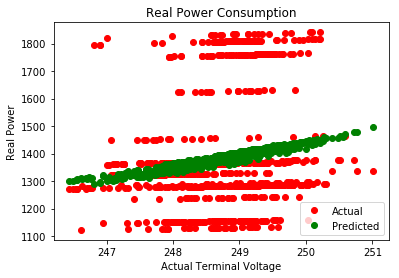

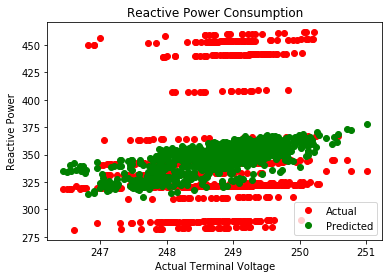

20 to 24


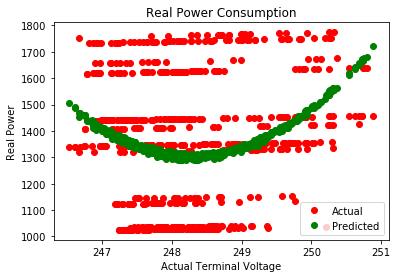

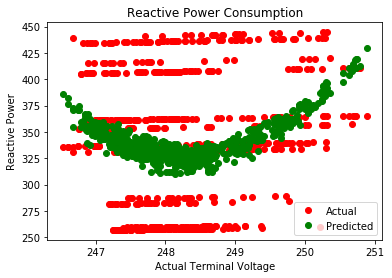

Weekends
0 to 4


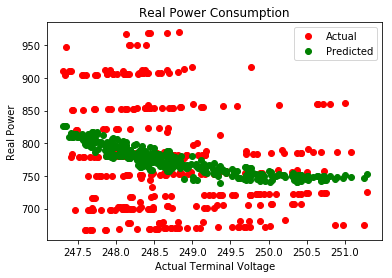

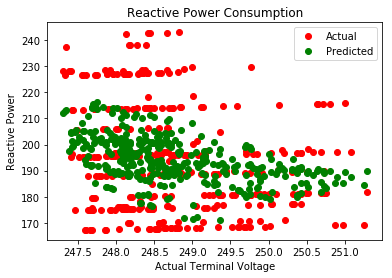

4 to 8


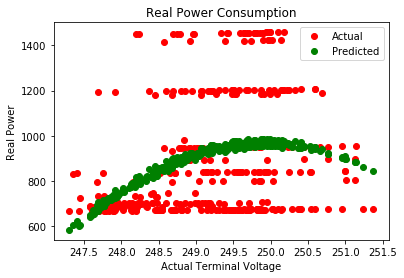

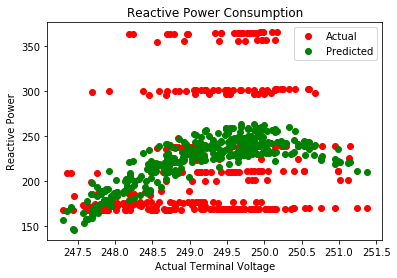

8 to 12


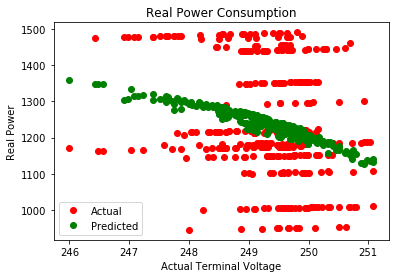

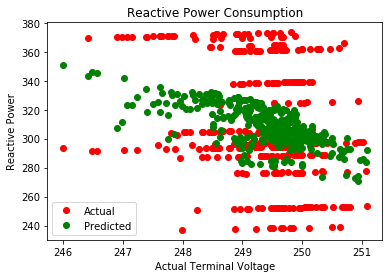

12 to 16


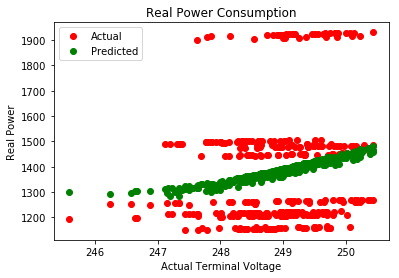

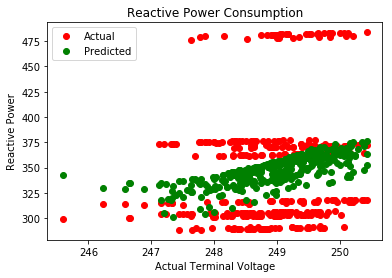

16 to 20


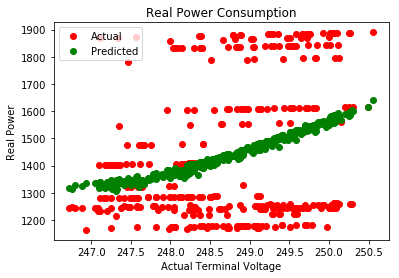

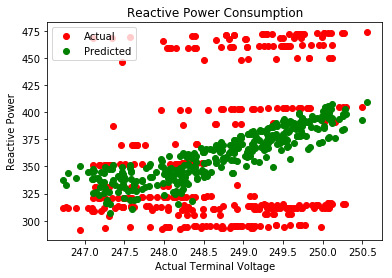

20 to 24


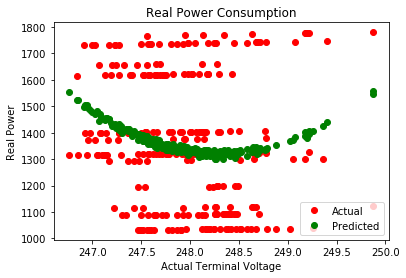

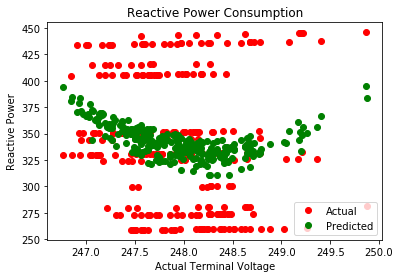

HOUR WINDOW IS 8
Season  1
2013-01-01
2013-03-01
Weekdays
0 to 4


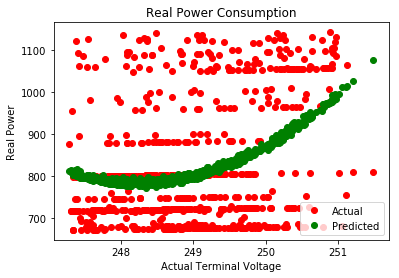

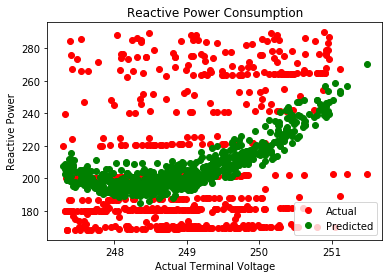

4 to 8


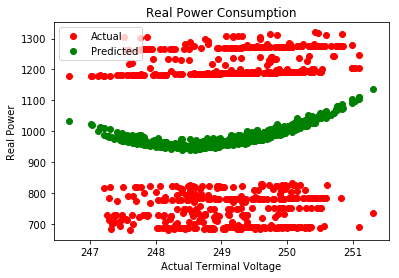

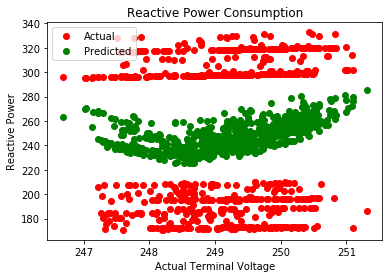

8 to 12


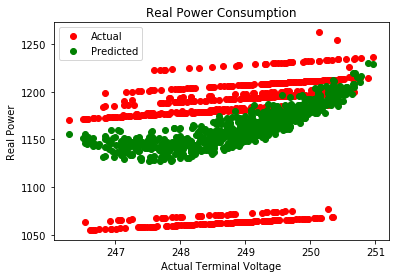

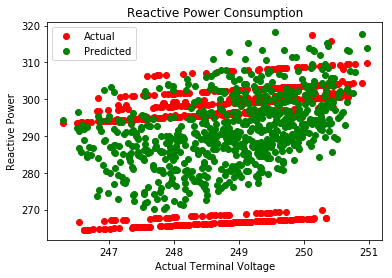

12 to 16


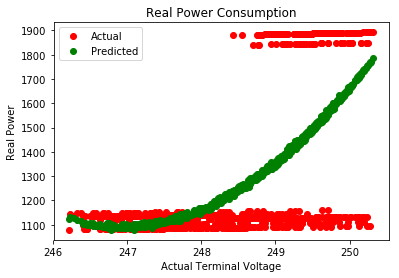

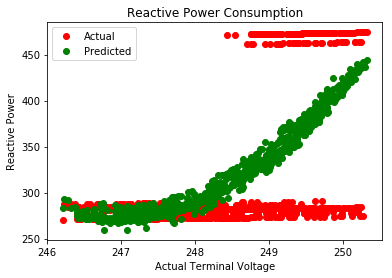

16 to 20


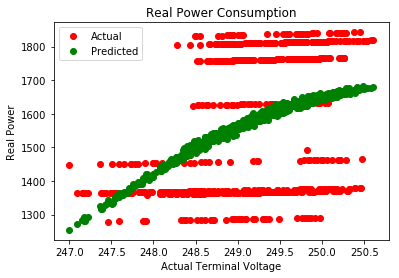

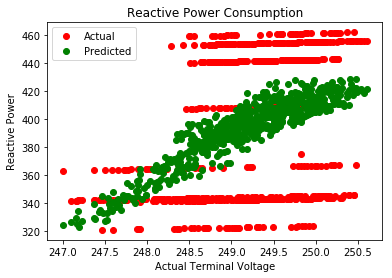

20 to 24


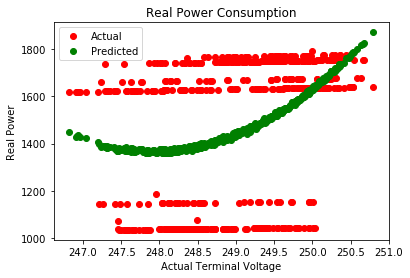

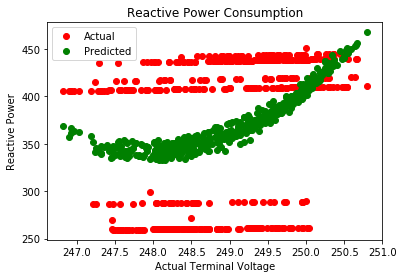

Weekends
0 to 4


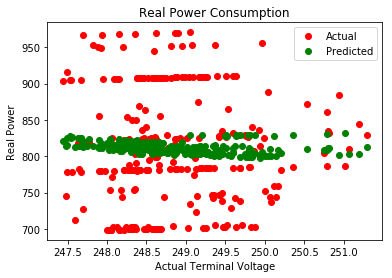

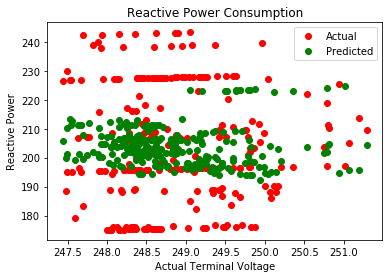

4 to 8


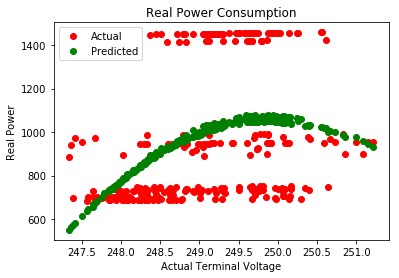

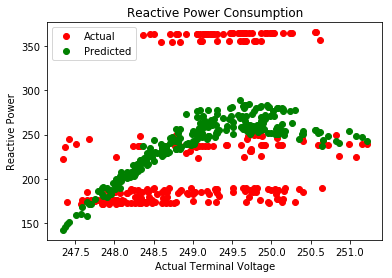

8 to 12


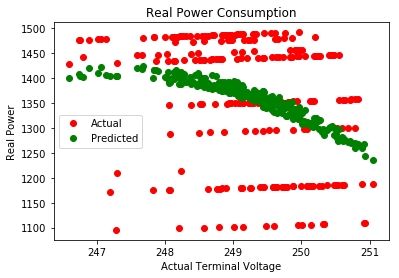

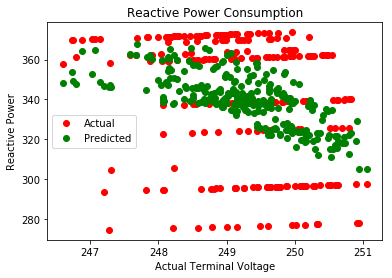

12 to 16


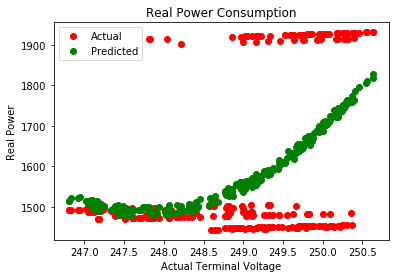

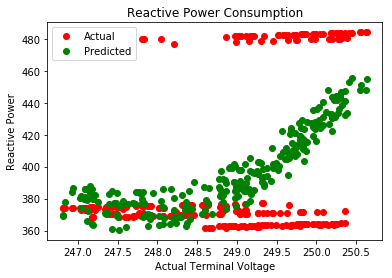

16 to 20


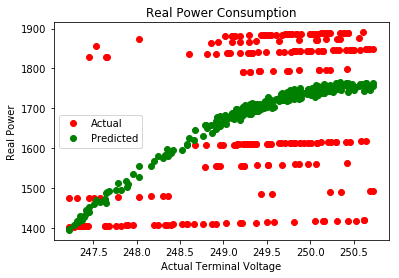

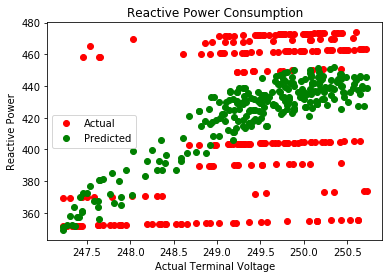

20 to 24


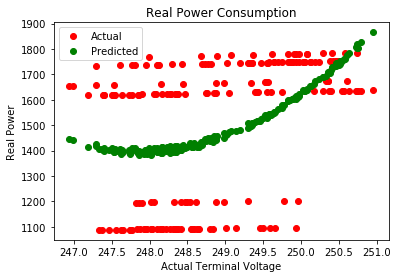

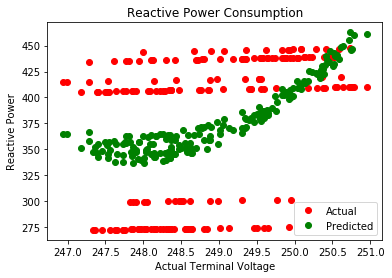

Season  2
2013-03-01
2013-05-15
Weekdays
0 to 4


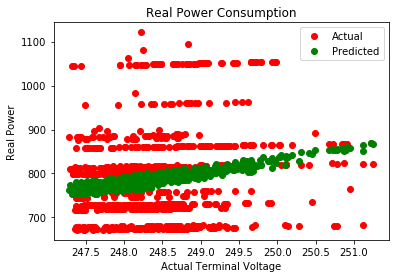

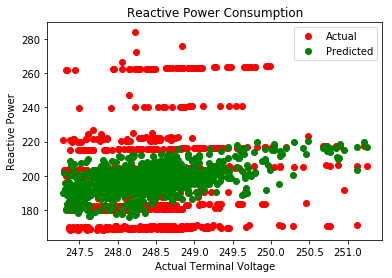

4 to 8


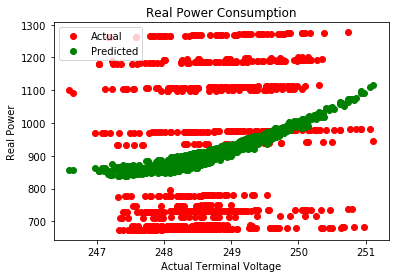

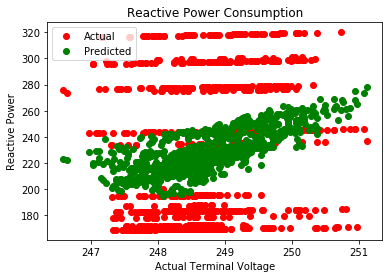

8 to 12


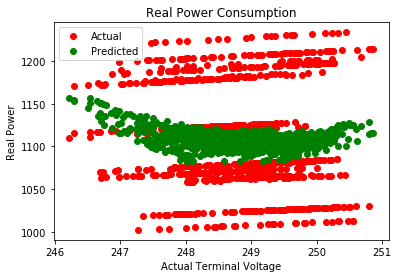

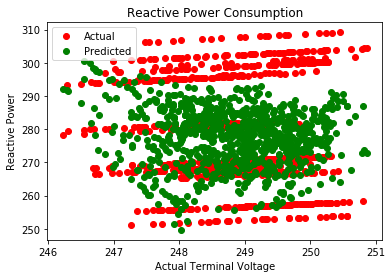

12 to 16


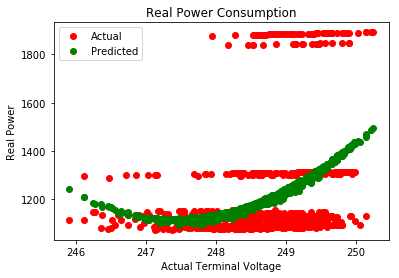

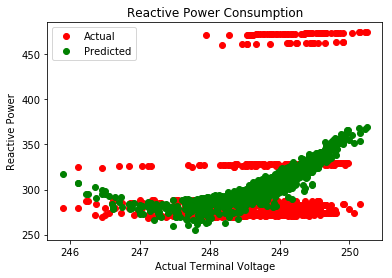

16 to 20


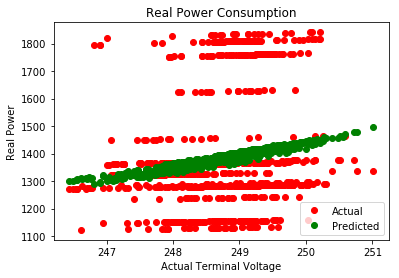

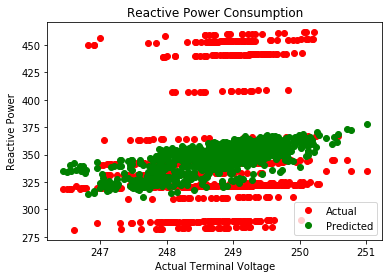

20 to 24


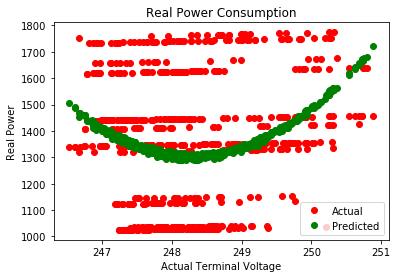

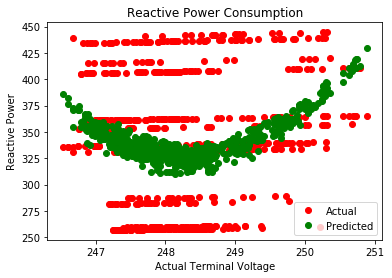

Weekends
0 to 4


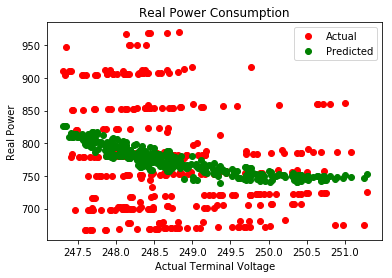

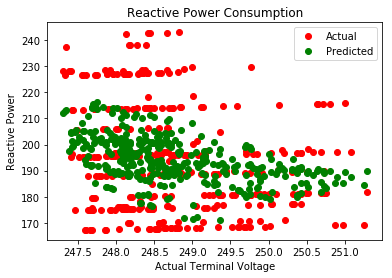

4 to 8


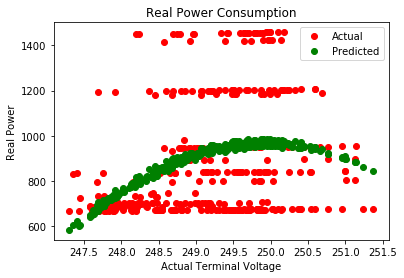

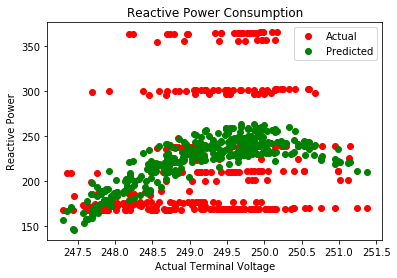

8 to 12


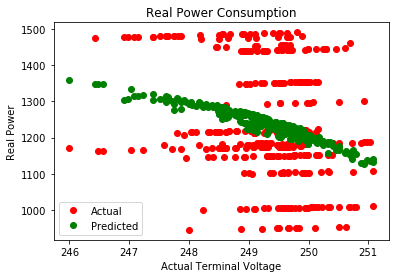

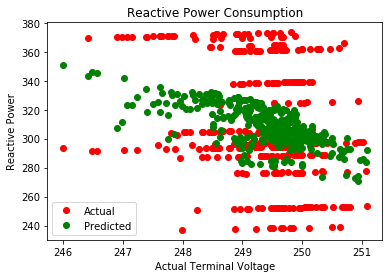

12 to 16


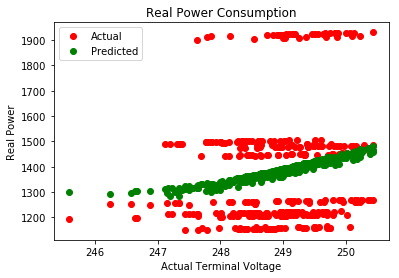

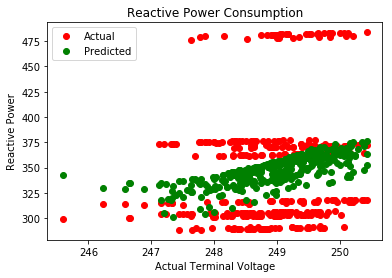

16 to 20


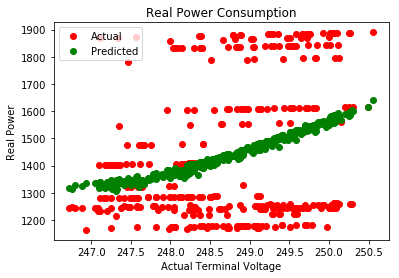

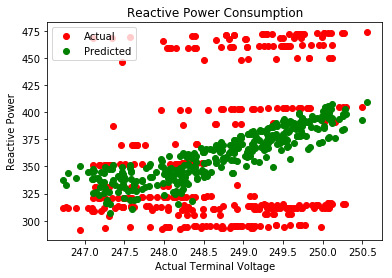

20 to 24


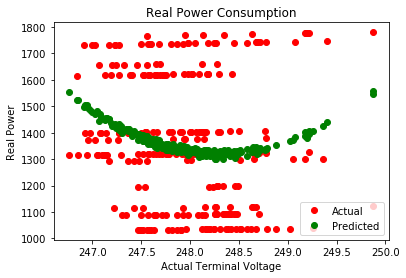

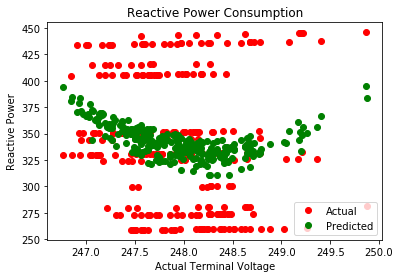

HOUR WINDOW IS 12
Season  1
2013-01-01
2013-03-01
Weekdays
0 to 4


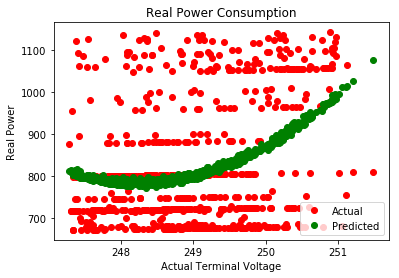

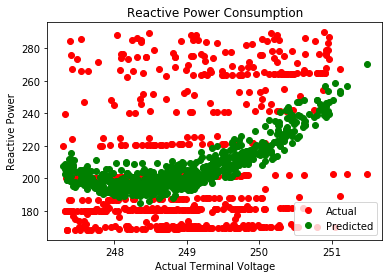

4 to 8


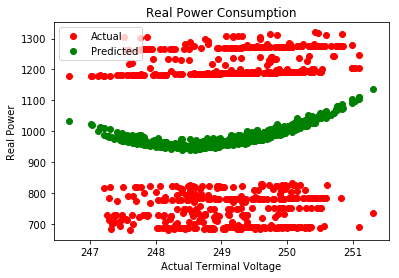

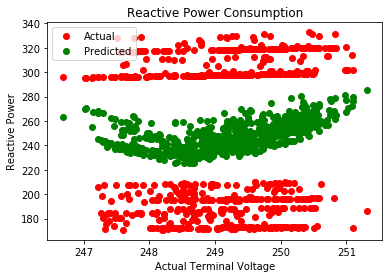

8 to 12


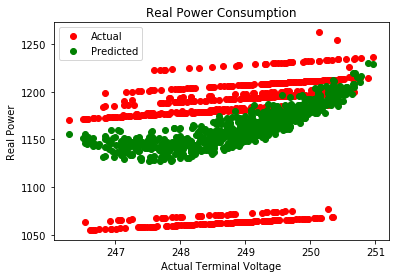

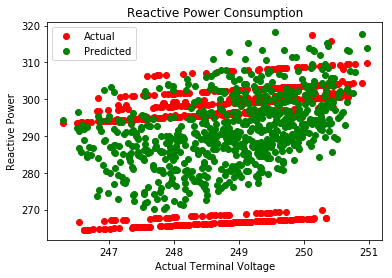

12 to 16


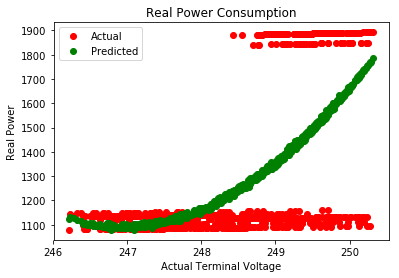

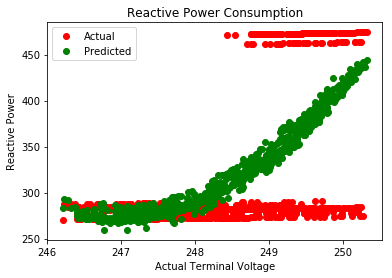

16 to 20


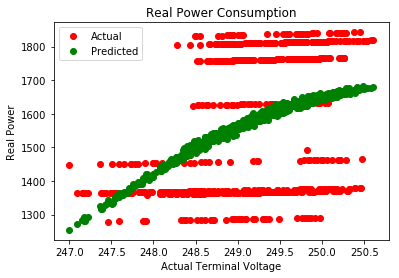

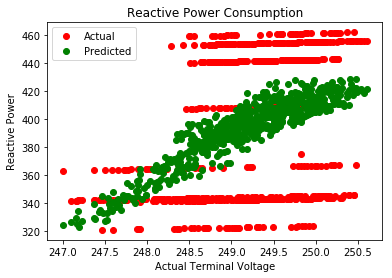

20 to 24


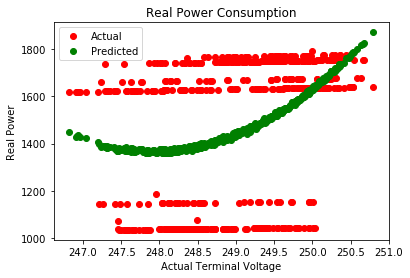

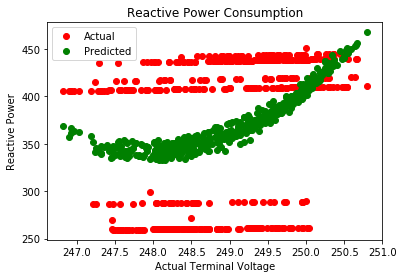

Weekends
0 to 4


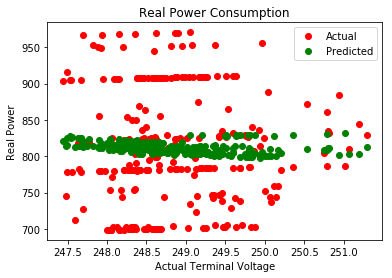

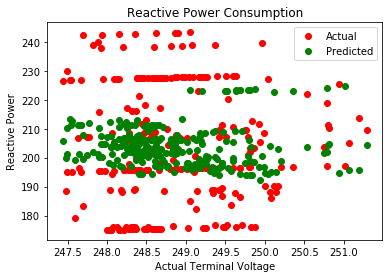

4 to 8


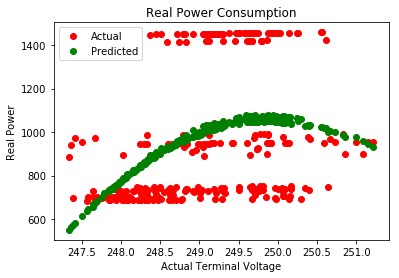

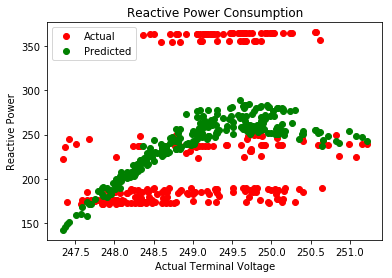

8 to 12


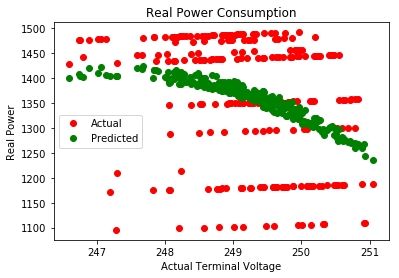

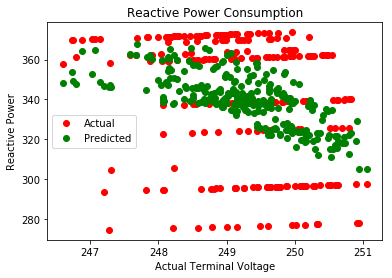

12 to 16


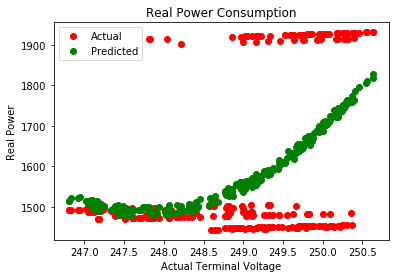

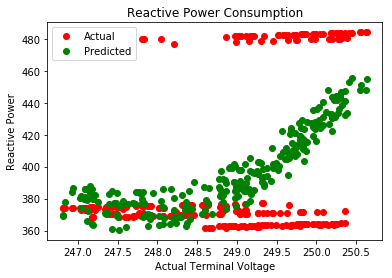

16 to 20


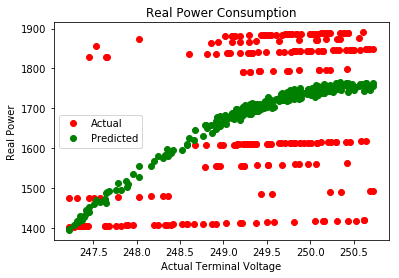

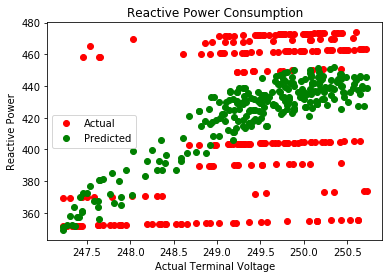

20 to 24


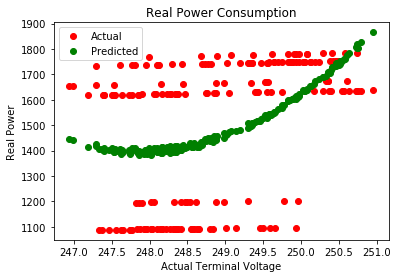

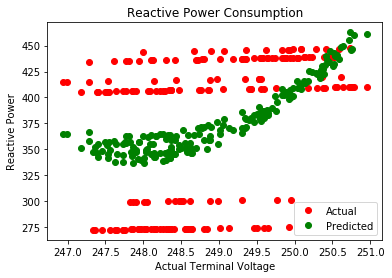

Season  2
2013-03-01
2013-05-15
Weekdays
0 to 4


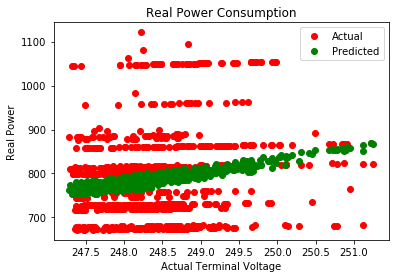

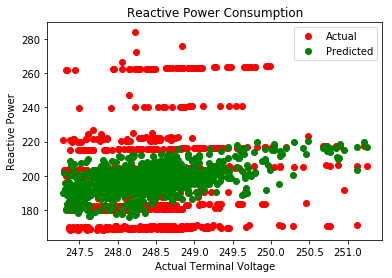

4 to 8


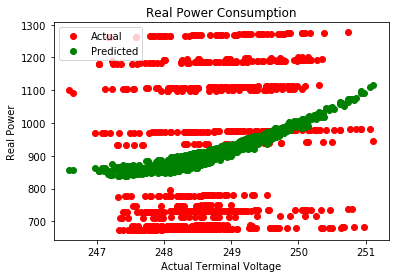

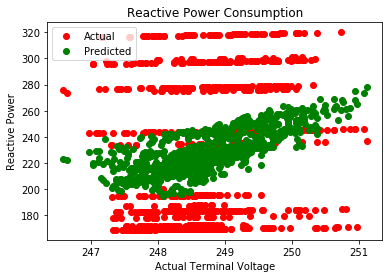

8 to 12


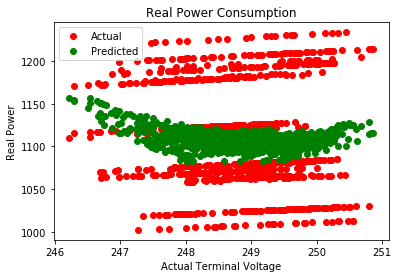

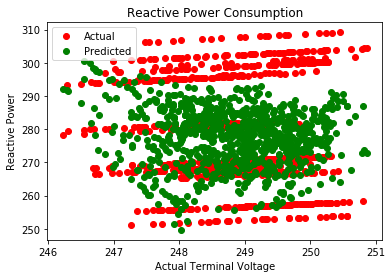

12 to 16


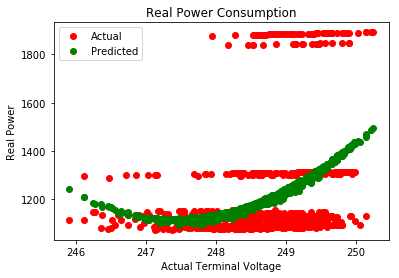

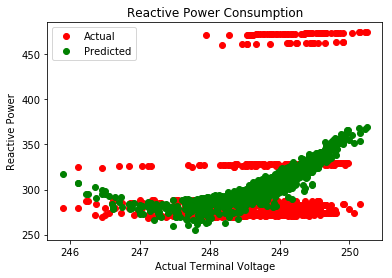

16 to 20


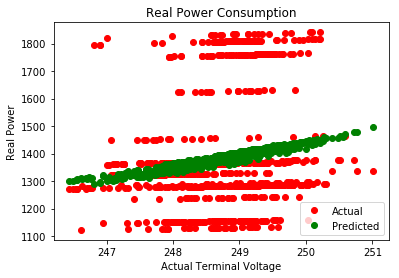

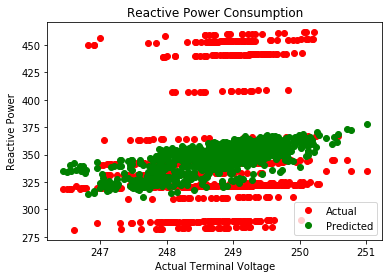

20 to 24


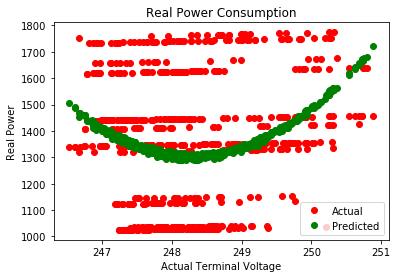

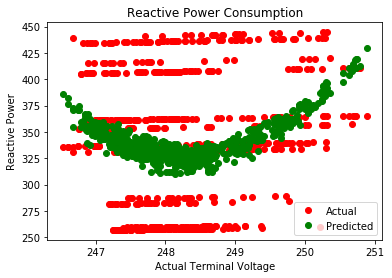

Weekends
0 to 4


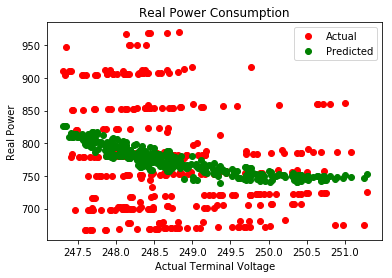

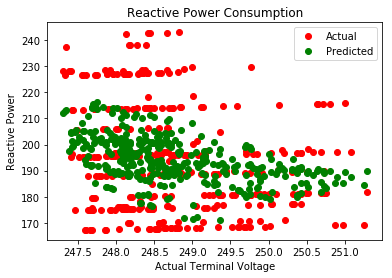

4 to 8


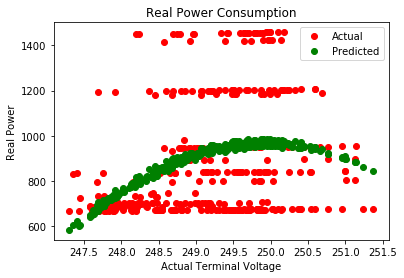

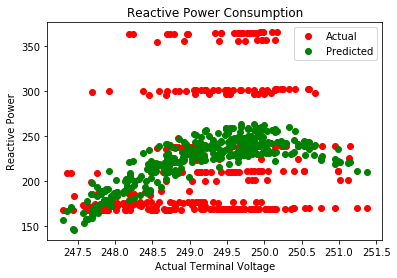

8 to 12


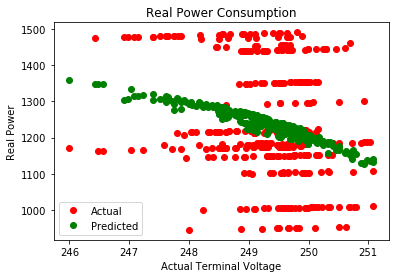

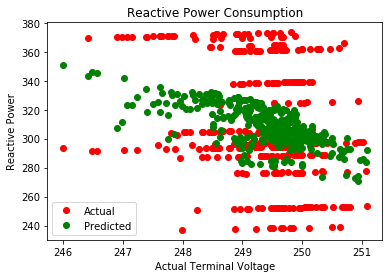

12 to 16


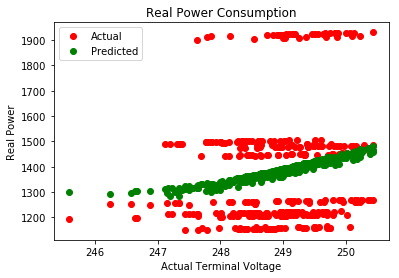

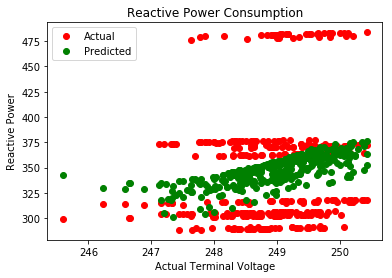

16 to 20


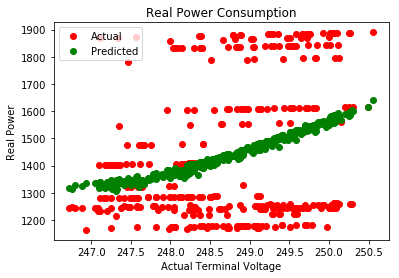

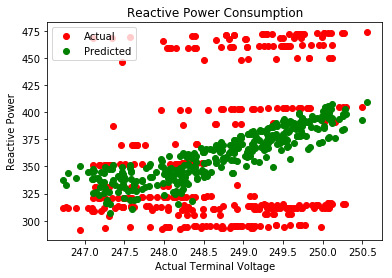

20 to 24


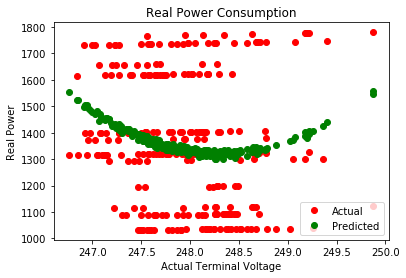

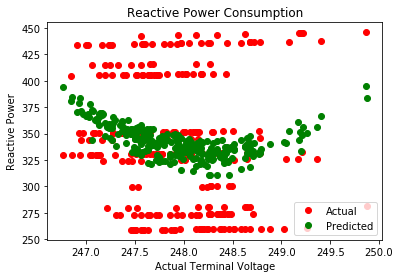

HOUR WINDOW IS 24
Season  1
2013-01-01
2013-03-01
Weekdays
0 to 4


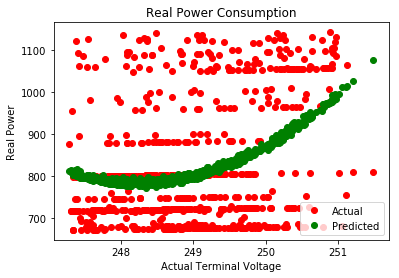

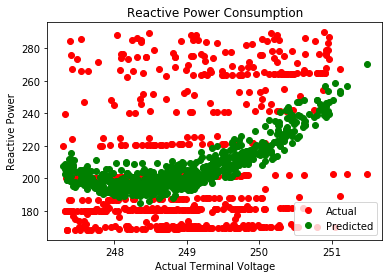

4 to 8


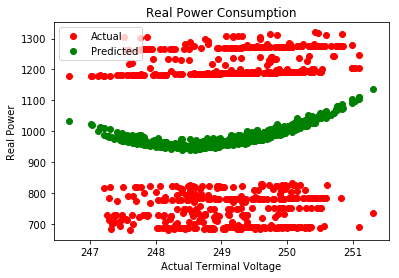

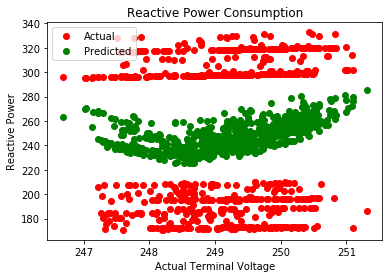

8 to 12


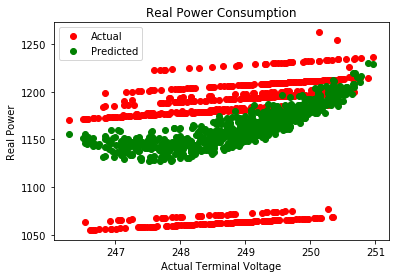

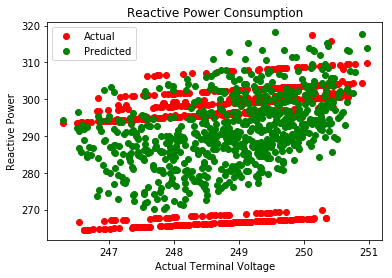

12 to 16


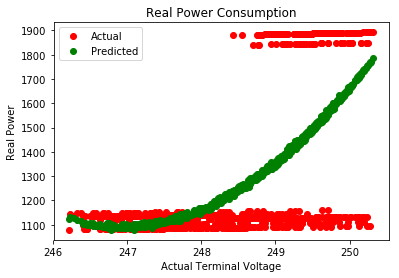

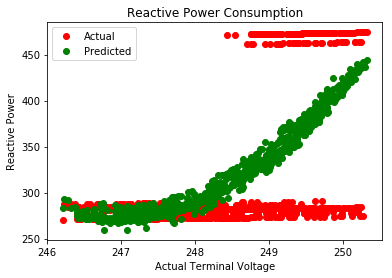

16 to 20


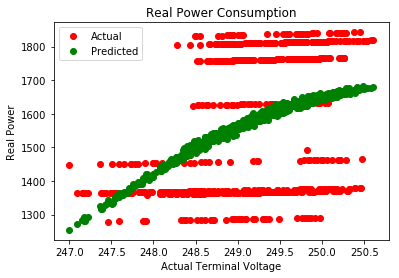

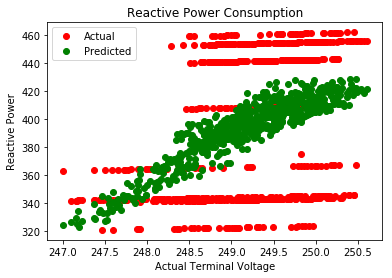

20 to 24


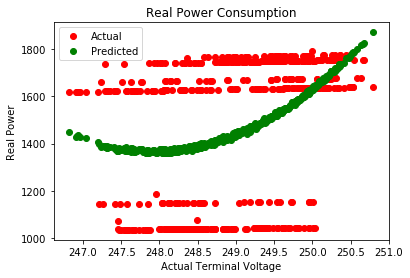

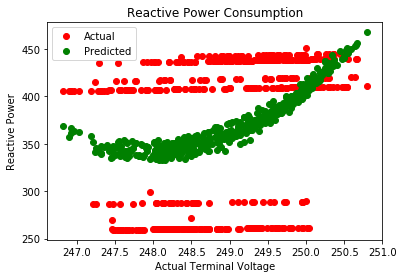

Weekends
0 to 4


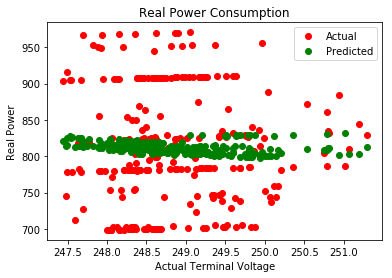

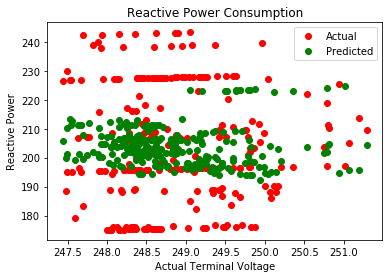

4 to 8


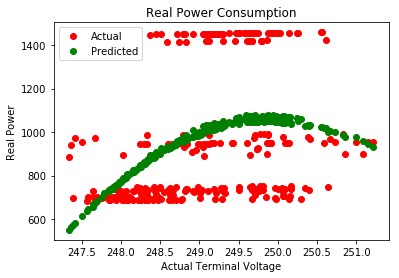

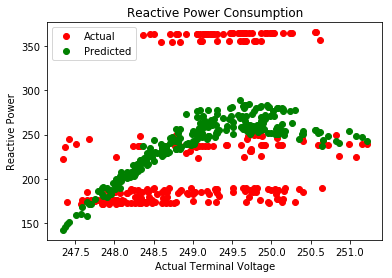

8 to 12


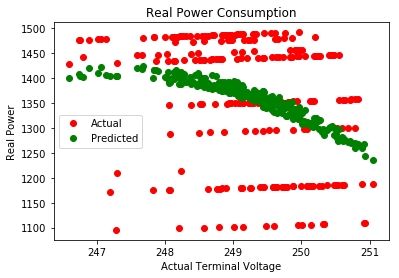

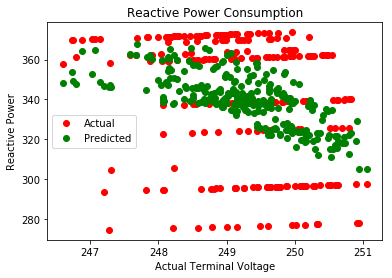

12 to 16


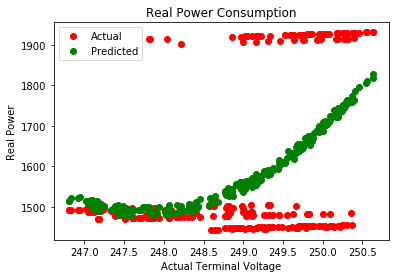

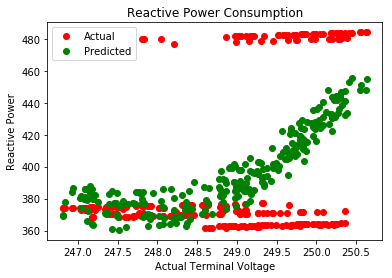

16 to 20


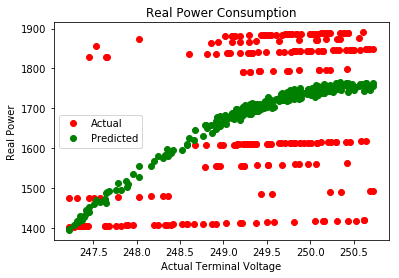

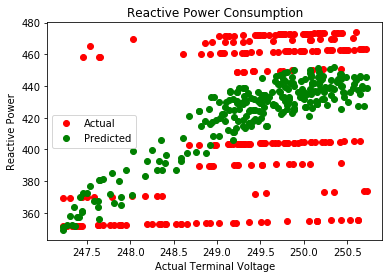

20 to 24


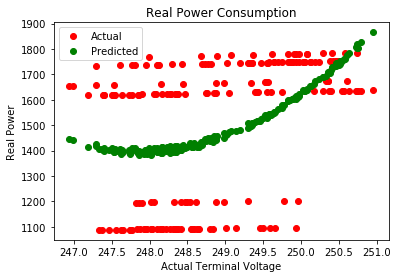

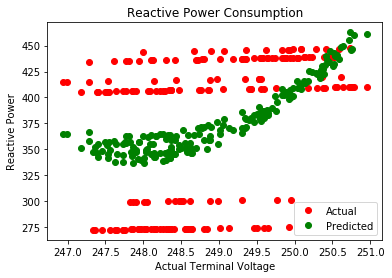

Season  2
2013-03-01
2013-05-15
Weekdays
0 to 4


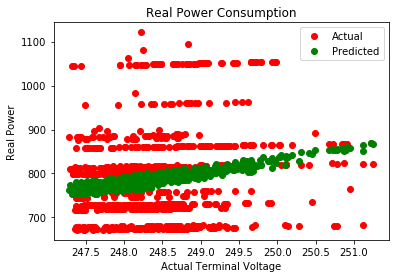

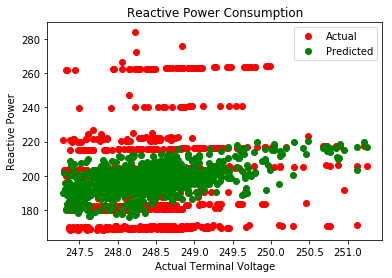

4 to 8


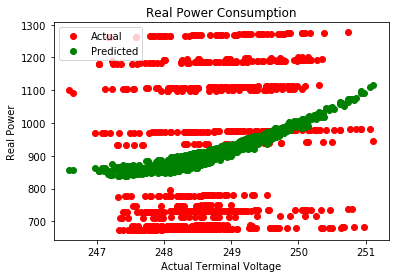

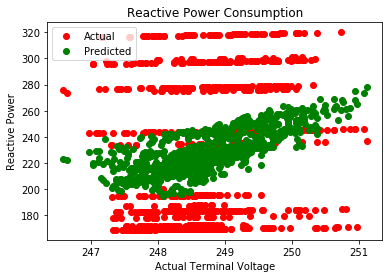

8 to 12


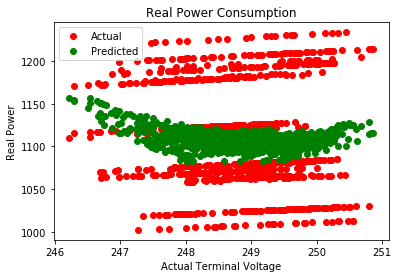

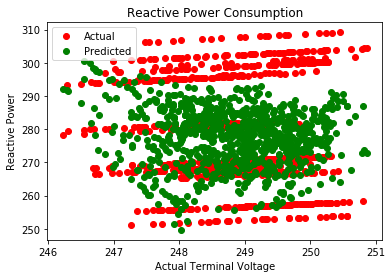

12 to 16


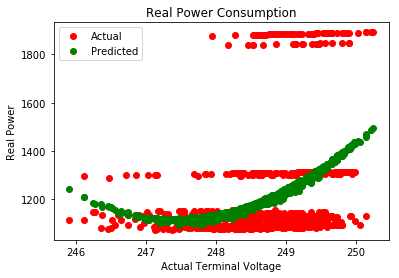

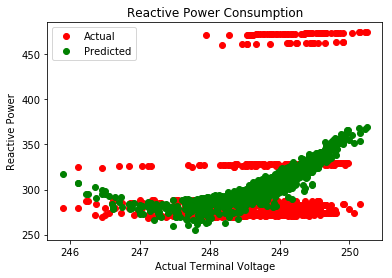

16 to 20


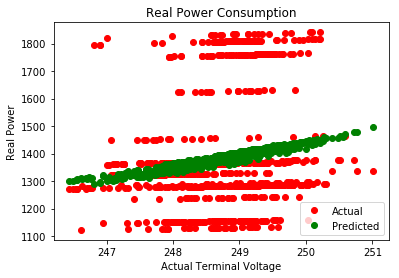

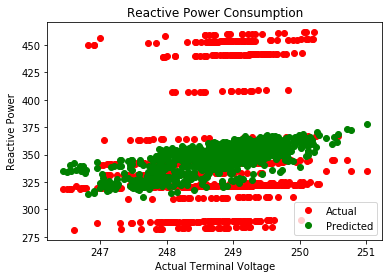

20 to 24


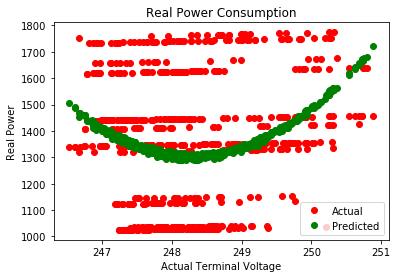

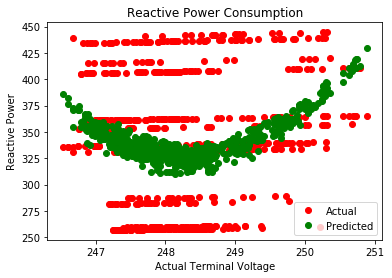

Weekends
0 to 4


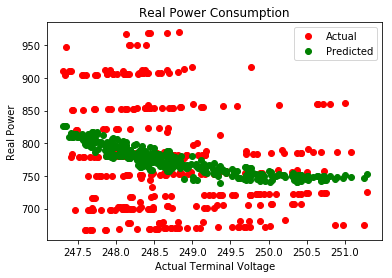

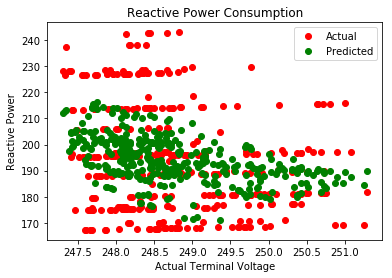

4 to 8


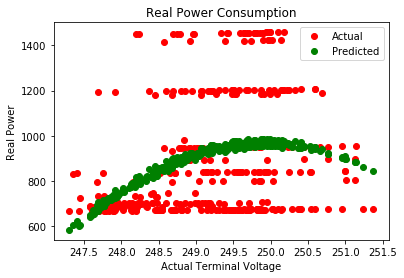

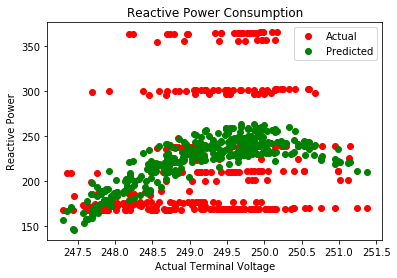

8 to 12


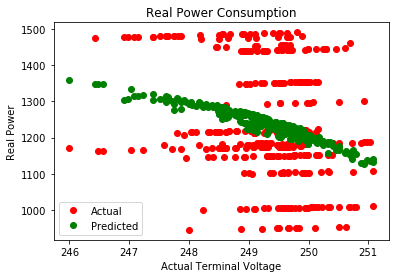

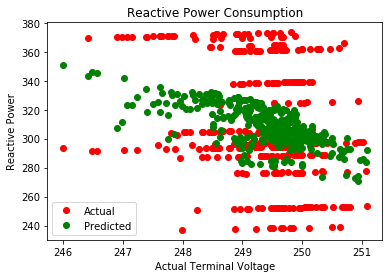

12 to 16


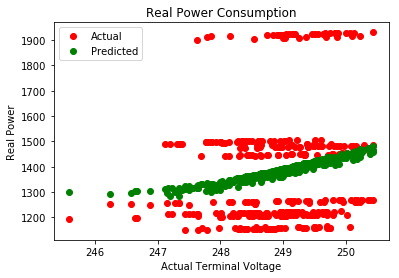

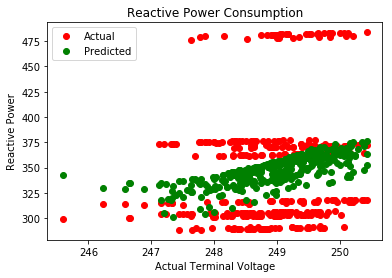

16 to 20


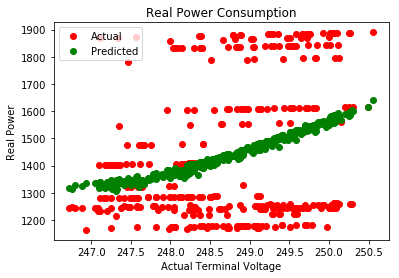

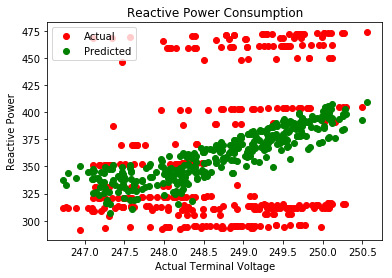

20 to 24


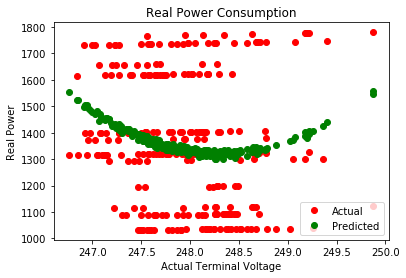

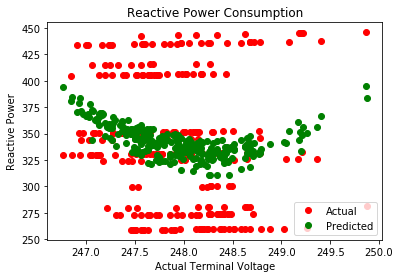

In [159]:
hourWindows=[1,2,4,8,12,24]

hourWindowDict={}
for hourWindow in hourWindows:
    hourWindowKey="HourWindow"+str(hourWindow)
    print("HOUR WINDOW IS",hourWindow)
    
    seasonDict={}
    for j in range(0,len(seasonDates)-1):
        realPowerSeason=realP[seasonDates[j]:seasonDates[j+1]]
        realVoltageSeason=realV[seasonDates[j]:seasonDates[j+1]]
        reactivePowerSeason=reactiveP[seasonDates[j]:seasonDates[j+1]]
        reactiveVoltageSeason=reactiveV[seasonDates[j]:seasonDates[j+1]]
        temperatureSeason=amiTemp[seasonDates[j]:seasonDates[j+1]]
    
        date_list=getDateList(seasonDates[j],seasonDates[j+1])
        print("Season ",j+1)
        print(seasonDates[j])
        print(seasonDates[j+1])
        seasonKey="Season"+str(j+1)
    
        dayTypeDict={}
        for i in (0,1):
            if i==0: #weekdays
                dayTypeKey="weekday"
                days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==1 or day.isoweekday()==2 or day.isoweekday()==3 or day.isoweekday()==4 or day.isoweekday()==5)]
                print("Weekdays")
            
            else: #weekends
                dayTypeKey="weekend"
                days=[(day.strftime('%Y-%m-%d')) for day in date_list if (day.isoweekday()==6 or day.isoweekday()==7)]
                print("Weekends")
        
            
            totalrealPower=getDays(realPowerSeason,days)
            totalrealVoltage=getDays(realVoltageSeason,days)
            totalreactivePower=getDays(reactivePowerSeason,days)
            totalreactiveVoltage=getDays(reactiveVoltageSeason,days)
            totaltemperature=getDays(temperatureSeason,days)
            
            
            hourDict={}
            hr=0
            while hr <24:
                
                realPower=getHourData(totalrealPower,hourwindow,hr)
                realVoltage=getHourData(totalrealVoltage,hourwindow,hr)
                reactivePower=getHourData(totalreactivePower,hourwindow,hr)
                reactiveVoltage=getHourData(totalreactiveVoltage,hourwindow,hr)
                temperature=getHourData(totaltemperature,hourwindow,hr)

                hourKey=str(hr)
            
                print(hr,"to",hr+hourwindow)
                hr=hr+hourwindow
                apparentVoltage=((realVoltage**2)+(reactiveVoltage**2))**0.5
                apparentPower=((realPower**2)+(reactivePower**2))**0.5
                independentVariable=apparentVoltage/apparentVoltage.mean() # or .median()
    
                columnNames=independentVariable.columns
                
                t=temperature.values
                t=np.reshape(t,len(t))
                x=independentVariable[columnNames[1]]
                x=x.values
            
                xaxis=apparentVoltage[columnNames[1]]
                y1=realPower[columnNames[1]].values
            
                y2=reactivePower[columnNames[1]].values
            
                coefficient1, covar = curve_fit(myfunc, (x,t), y1,maxfev=8000)#,method='lm',p0=init_vals)
                coefficient2, covar = curve_fit(myfunc, (x,t), y2,maxfev=8000)#,method='lm',p0=init_vals)

                xx= np.linspace(x.min(),x.max(),100)
                xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)


                fid,cx = pyplot.subplots()
                cx.plot(xaxis,y1,'ro',label='Actual')
                cx.plot(xaxis,myfunc((x,t),coefficient1[0],coefficient1[1],coefficient1[2]),'go',label='Predicted')
                rms1=RMS(y1,myfunc((x,t),coefficient1[0],coefficient1[1],coefficient1[2]))
            
                cx.legend()
                cx.set_title('Real Power Consumption')
                cx.set_xlabel('Actual Terminal Voltage')
                cx.set_ylabel('Real Power')
                pyplot.show()
            
                xx= np.linspace(x.min(),x.max(),100)
                xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)

                fid,cx = pyplot.subplots()
                cx.plot(xaxis,y2,'ro',label='Actual')
                cx.plot(xaxis,myfunc((x,t),coefficient2[0],coefficient2[1],coefficient2[2]),'go',label='Predicted')
                rms2=RMS(y2,myfunc((x,t),coefficient2[0],coefficient2[1],coefficient2[2]))
            
                cx.legend()
                cx.set_title('Reactive Power Consumption')
                cx.set_xlabel('Actual Terminal Voltage')
                cx.set_ylabel('Reactive Power')
                pyplot.show()
            
                hourmetrics1=np.append(coefficient1,rms1)
                hourmetrics2=np.append(coefficient2,rms2)
                
                                
                innerDict={'real': pd.DataFrame(np.reshape(hourmetrics1,(1,len(hourmetrics1)))), 'reactive':pd.DataFrame(np.reshape(hourmetrics2,(1,len(hourmetrics2))))}
                df=pd.concat(innerDict)
                df=df.reset_index(level=1, drop=True)

                hourDict[hourKey]=df
                
            outerDF=pd.concat(hourDict)
            
            dayTypeDict[dayTypeKey]=outerDF
            
        oouterDF=pd.concat(dayTypeDict)
        seasonDict[seasonKey]=oouterDF
    seasonDF=pd.concat(seasonDict)
    hourWindowDict[hourWindowKey]=seasonDF
hourWindowDF=pd.concat(hourWindowDict)
columnNames=['coefficient1','coefficient2','coefficient3','rms']
hourWindowDF.columns=columnNames